In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import plotly.offline as py
from plotly.figure_factory import create_table

import matplotlib.pyplot as plt 
%matplotlib inline 

pd.set_option('display.precision', 2)
sns.set(rc={"axes.facecolor":"Beige" , "axes.grid" : False})
#plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =  pd.read_csv("/kaggle/input/titanic/heart_disease_uci.csv")
df = df.dropna()
df.head(2)

id  age   sex    dataset              cp  trestbps   chol    fbs  \
0   1   63  Male  Cleveland  typical angina     145.0  233.0   True   
1   2   67  Male  Cleveland    asymptomatic     160.0  286.0  False   

          restecg  thalch  exang  oldpeak        slope   ca          thal  num  
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0  fixed defect    0  
1  lv hypertrophy   108.0   True      1.5         flat  3.0        normal    2

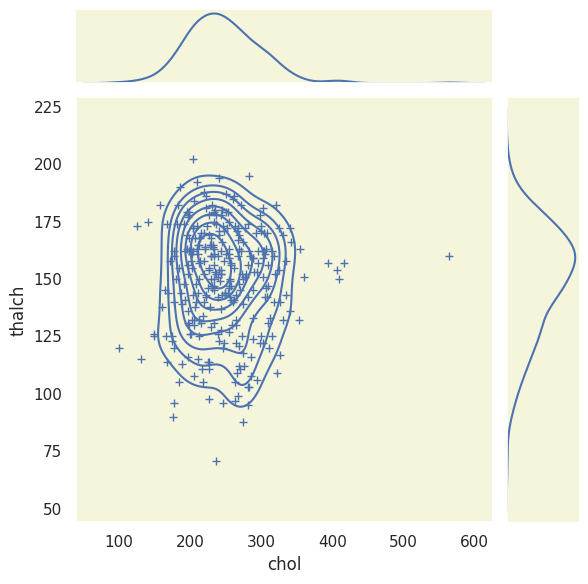

In [3]:
g = sns.jointplot(x="chol", y="thalch", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("chol", "thalch");

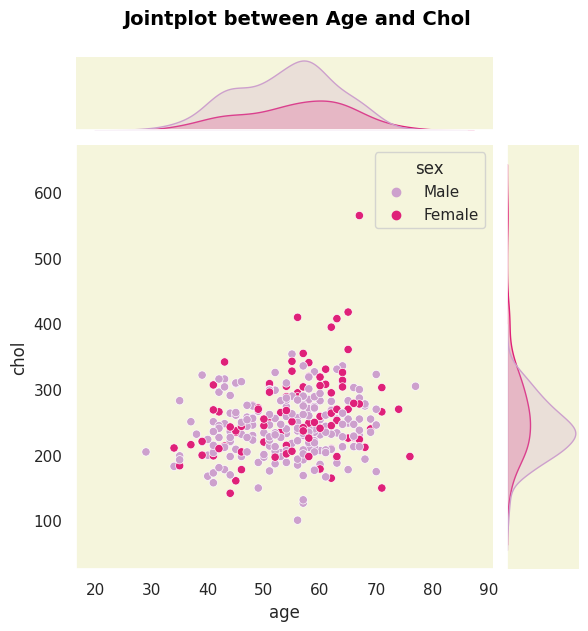

In [4]:
# --- Create Jointplot ---
jointplot = sns.jointplot(x = 'age', y = 'chol', data = df, hue = 'sex', palette = 'PuRd')


# --- Jointplot Titles & Text ---
jointplot.fig.suptitle('Jointplot between Age and Chol', fontweight = 'heavy', y = 1.05, fontsize = '14',
                       fontfamily = 'sans-serif', color = 'black');

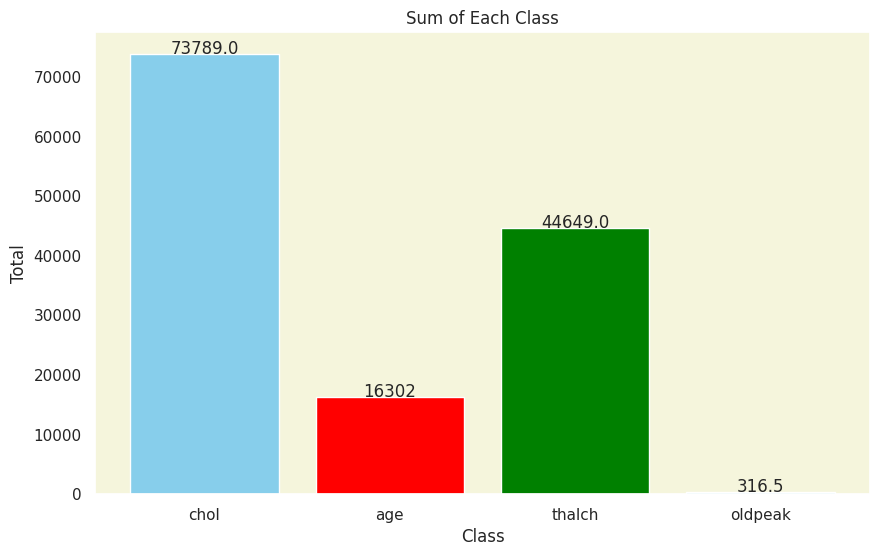

In [5]:
import matplotlib.pyplot as plt

# Define the labels
labels = ['chol', 'age', 'thalch','oldpeak']

# Calculate counts
counts = [df[label].sum() for label in labels]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=['skyblue', 'Red', 'Green'])

# Add value labels on top of each bar with some vertical offset
for bar, count in zip(bars, counts):
    yval = bar.get_height() + 0.1  # Add a small offset
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(count), ha='center')

plt.title('Sum of Each Class')
plt.xlabel('Class')
plt.ylabel('Total')
plt.show()

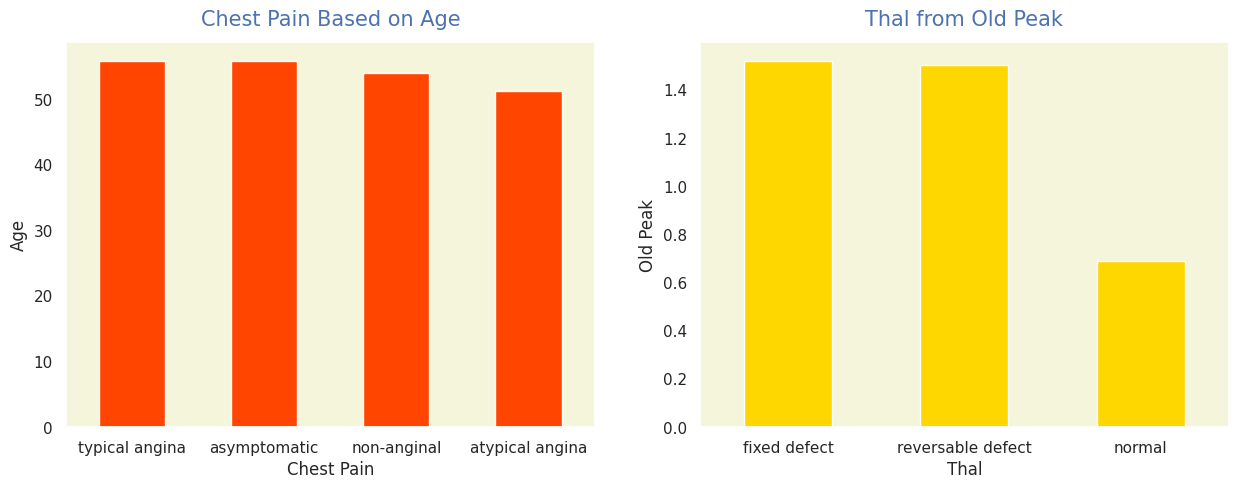

In [6]:
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
chart = df.groupby('cp')['age'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Chest Pain Based on Age', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Chest Pain')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
chart = df.groupby('thal')['oldpeak'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'gold')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Thal from Old Peak', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Thal')
plt.ylabel('Old Peak')
plt.show()

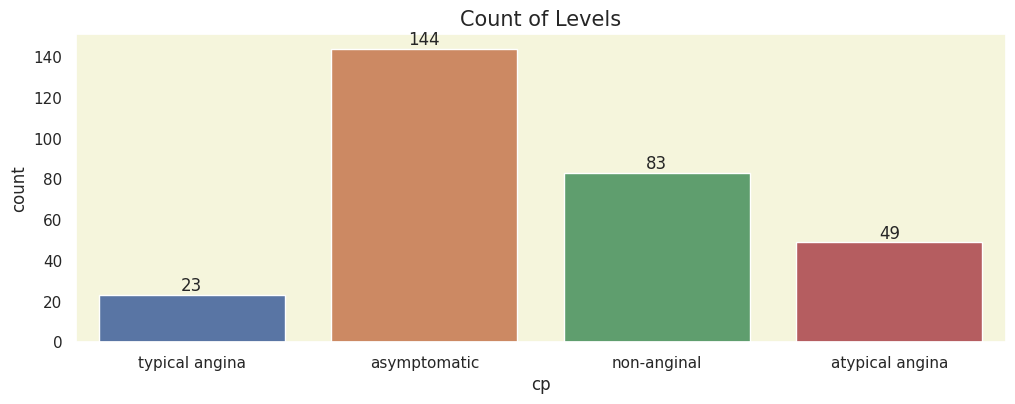

In [7]:
plt.figure(figsize = (12,4))
ax = sns.countplot(x=df.cp)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count of Levels", fontsize = 15);

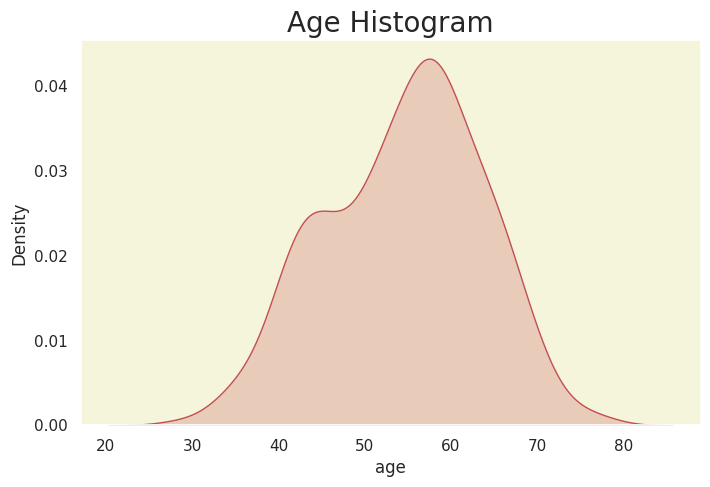

Histogram's skewness is -0.21485314045391055 and kurtosis is -0.5174882052116159


In [8]:
plt.figure(figsize = (8,5))
sns.kdeplot(df.age, shade = True, color = "r")
plt.title("Age Histogram", fontsize = 20)
plt.show()
print("Histogram's skewness is {} and kurtosis is {}".format(df.age.skew(), df.age.kurtosis()))

In [9]:
import scipy.stats as stats

df_numeric = df.select_dtypes(include='number')

results = []

for col in df_numeric.columns:
    skewness = df_numeric[col].skew()
    kurtosis = df_numeric[col].kurt()
    results.append([col, skewness, kurtosis])

df_stats = pd.DataFrame(results, columns=['Column', 'Skewness', 'Kurtosis'])
df_stats

Column  Skewness  Kurtosis
0        id      0.90      3.95
1       age     -0.21     -0.52
2  trestbps      0.70      0.80
3      chol      1.03      4.35
4    thalch     -0.53     -0.09
5   oldpeak      1.24      1.52
6        ca      1.19      0.26
7       num      1.05     -0.16

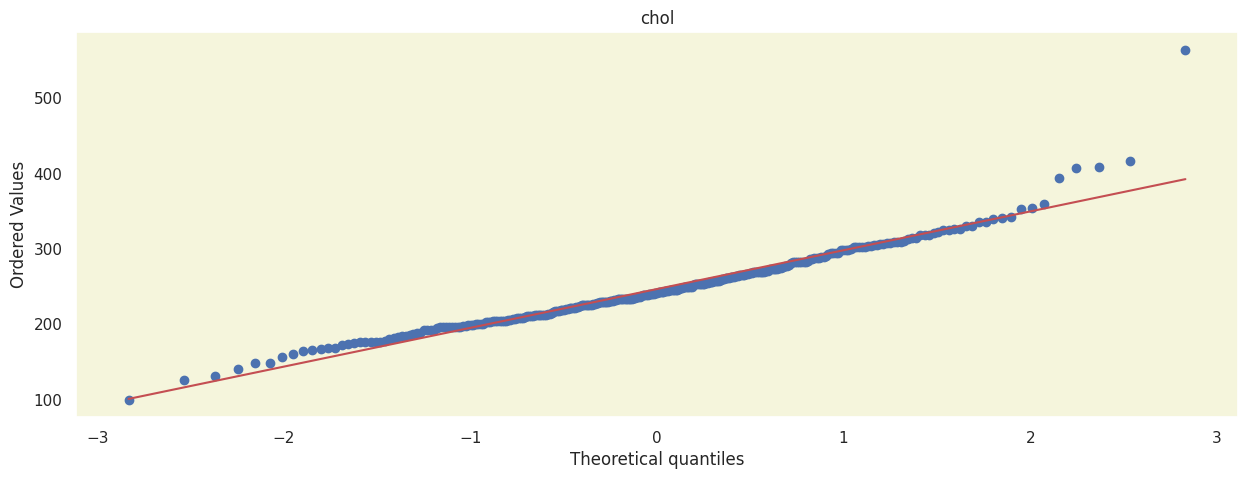

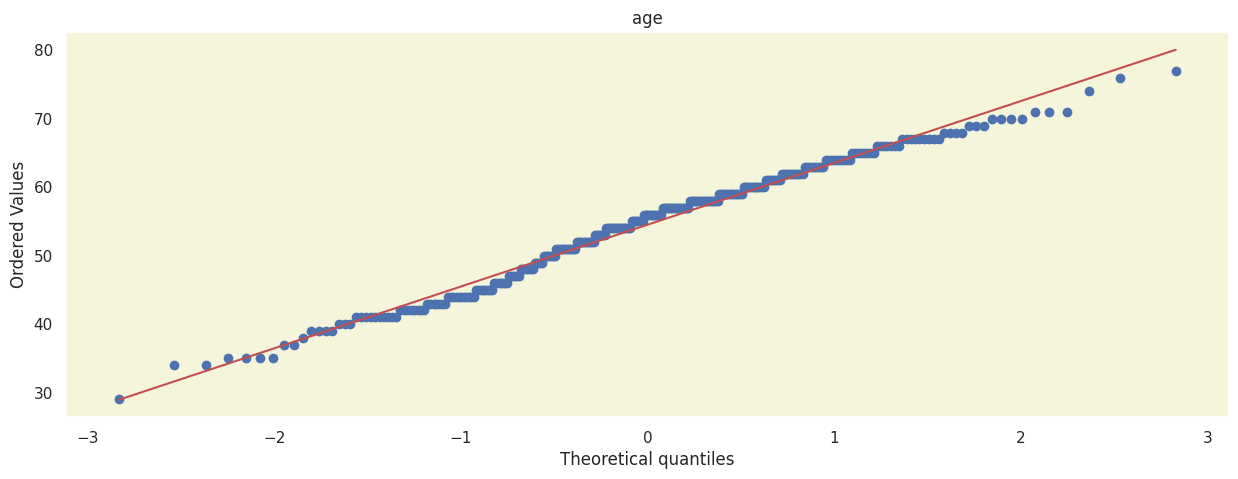

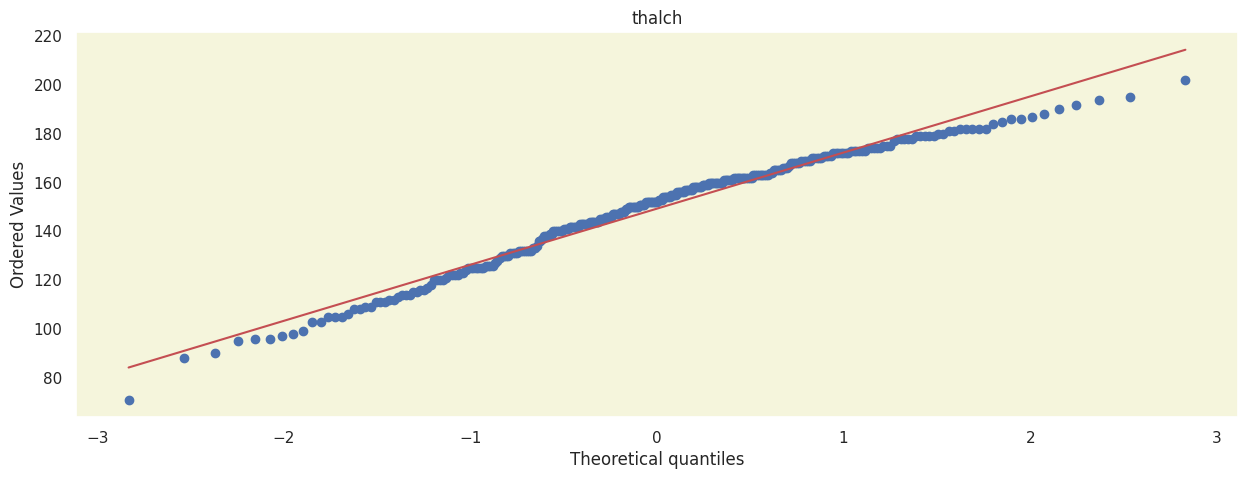

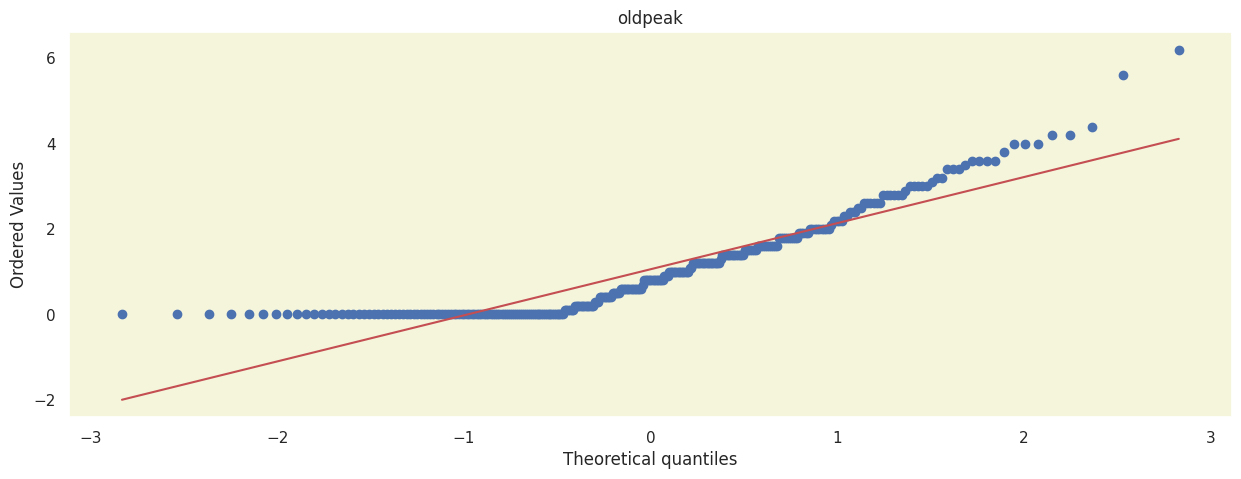

In [10]:
from scipy.stats import norm

dfx = df[['chol', 'age', 'thalch','oldpeak']]

for col in dfx:
    stats.probplot(dfx[col],plot=plt)
    plt.title(col)
    plt.show();

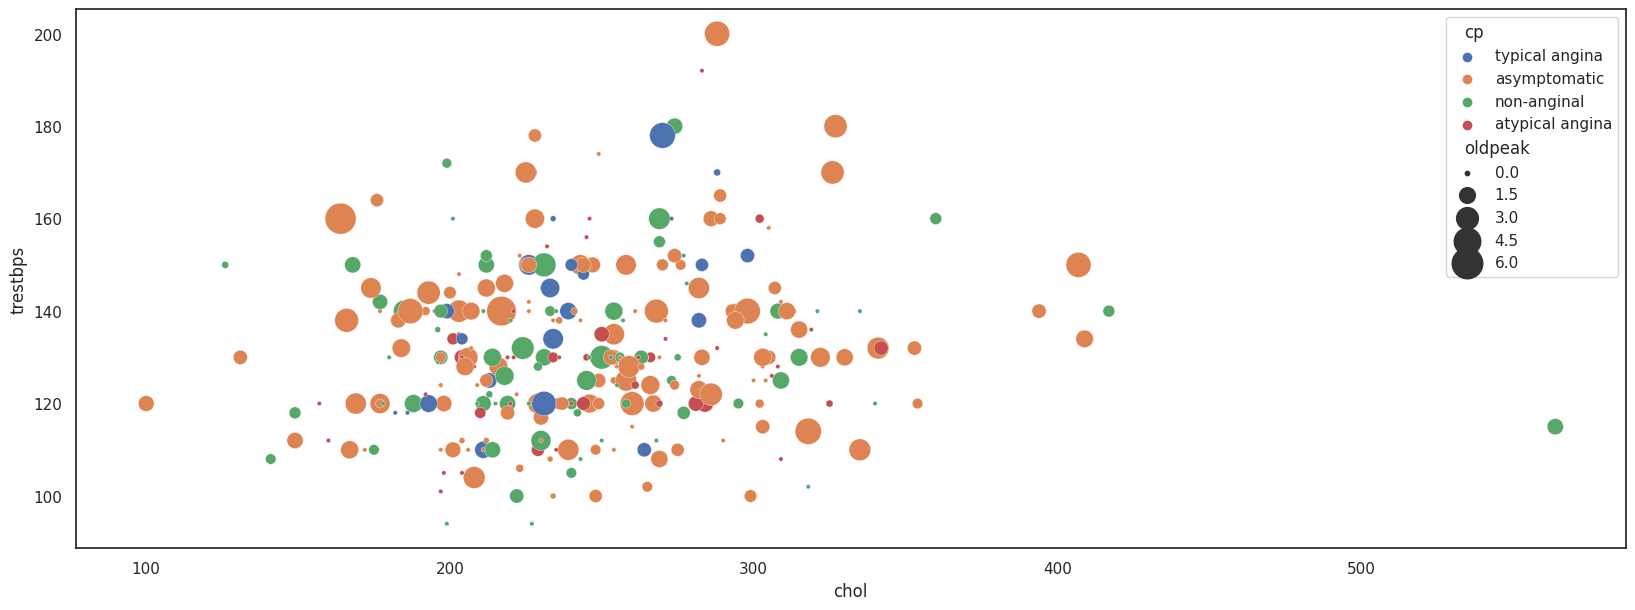

In [11]:
sns.set(rc={'figure.figsize':(20,7)})
sns.set_style("white")
sns.scatterplot(data=df, x="chol", y="trestbps", size="oldpeak", hue='cp',legend=True, sizes=(10, 500));

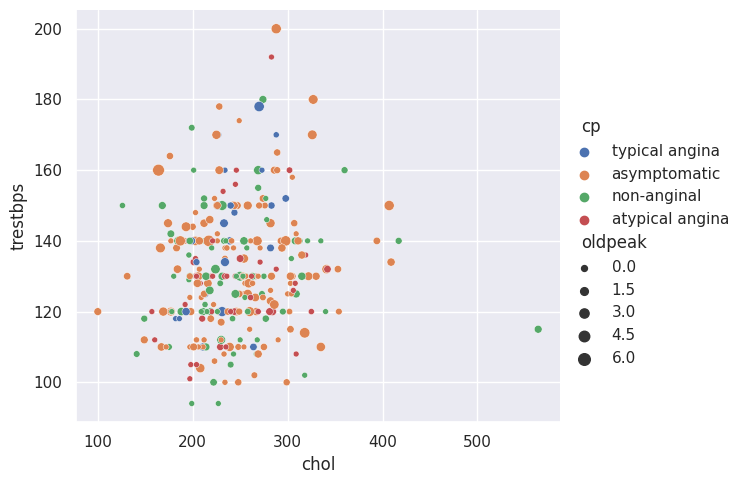

In [12]:
sns.set(rc={'figure.figsize':(20,7)})
sns.relplot(y='trestbps',x='chol',data=df,kind='scatter',size='oldpeak',hue='cp',aspect=1.2);

In [13]:
import altair as alt

# Create the chart with increased size
chart = alt.Chart(df).mark_point().encode(
    alt.Y('trestbps'),
    alt.X('chol'),
    alt.Color('cp'),
    alt.OpacityValue(0.7),
    size='oldpeak'
).properties(
    width=1400,
    height=400
)

chart.show()

alt.Chart(...)

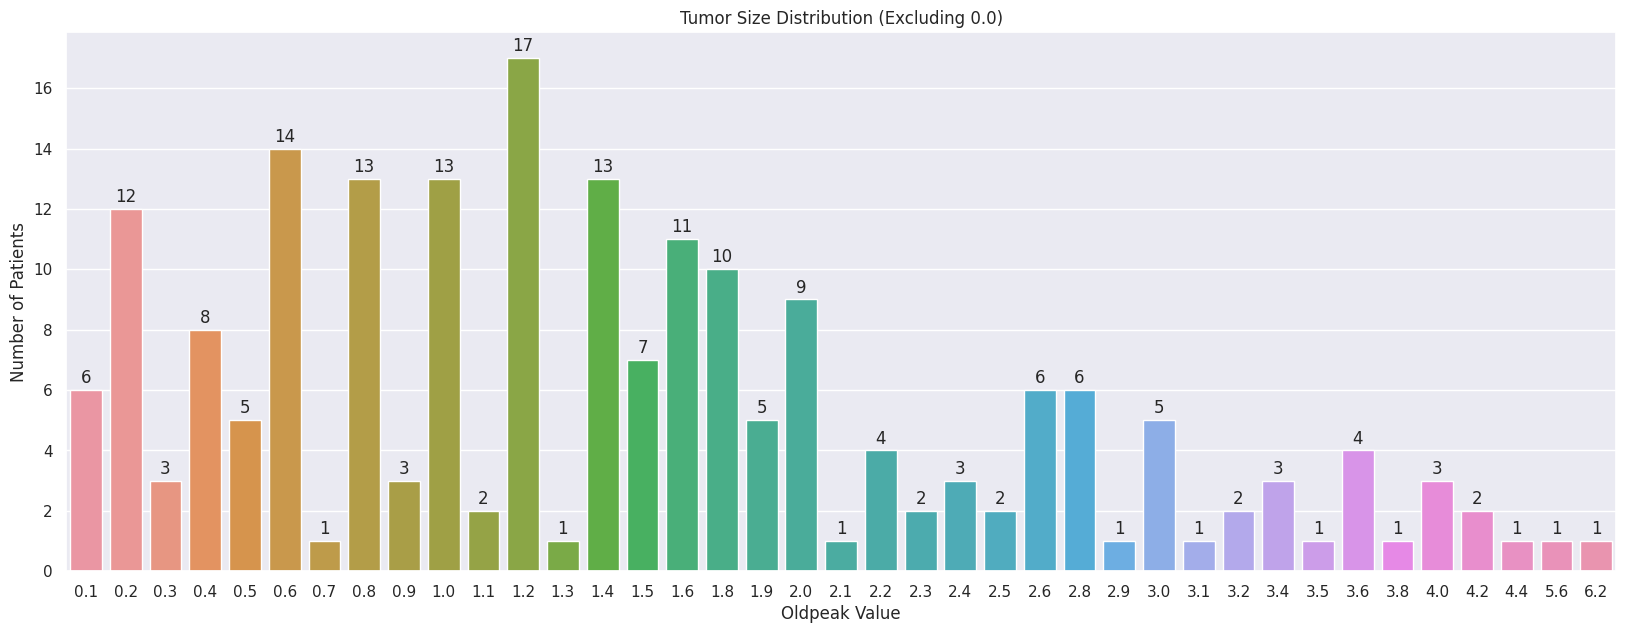

In [14]:
# Filter out rows with 'oldpeak' equal to 0.0
df_filtered = df[df['oldpeak'] != 0.0]

# Create the countplot
plt.figure(figsize=(20, 7))
sns.countplot(data=df_filtered, x='oldpeak', order=sorted(df_filtered['oldpeak'].unique()))

# Access bars through the current axes
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, int(bar.get_height()), ha='center', va='bottom')

# Add labels and title
plt.title('Tumor Size Distribution (Excluding 0.0)')
plt.ylabel('Number of Patients')
plt.xlabel('Oldpeak Value')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

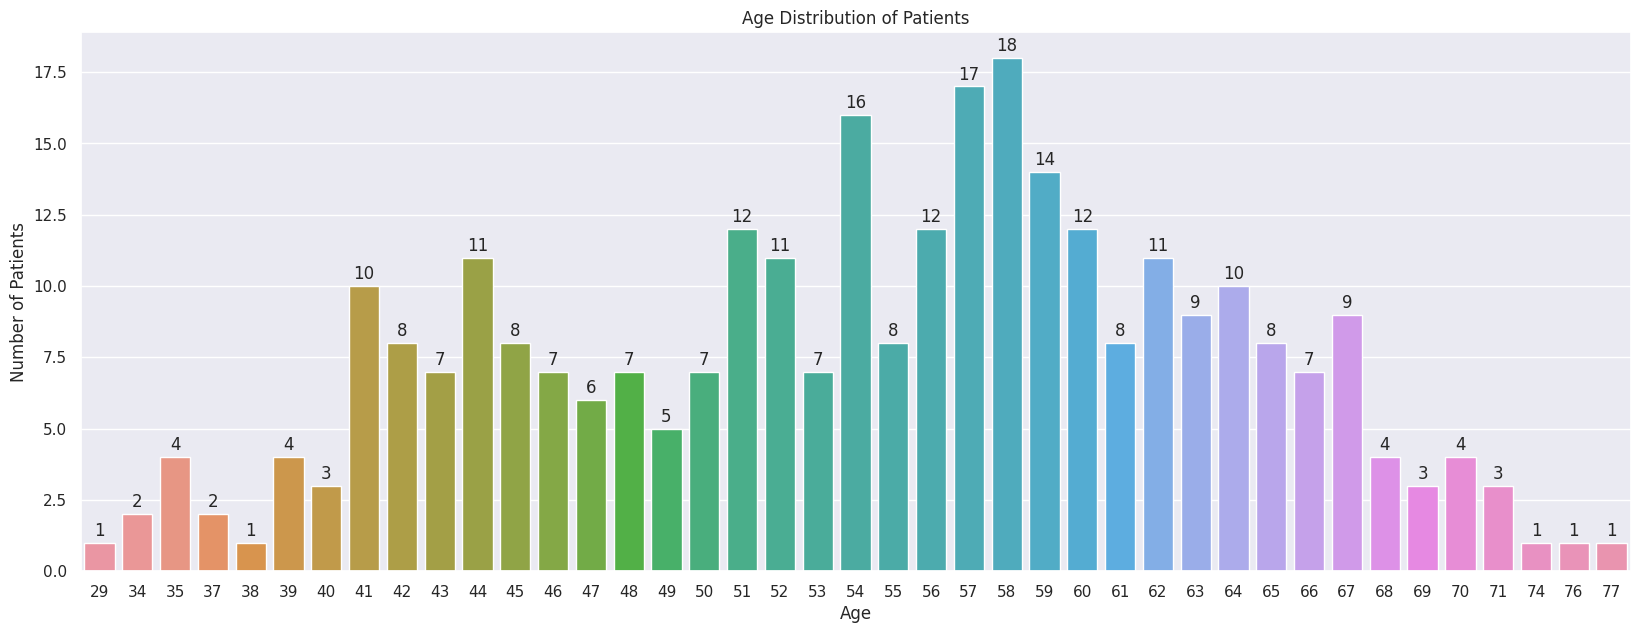

In [15]:
plt.figure(figsize=(20, 7))
# Create the countplot
sns.countplot(data=df, x='age', order=sorted(df['age'].unique()))

# Access bars through the current axes
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, int(bar.get_height()), ha='center', va='bottom')

# Add labels and title
plt.title('Age Distribution of Patients')
plt.ylabel('Number of Patients')
plt.xlabel('Age')
plt.show()

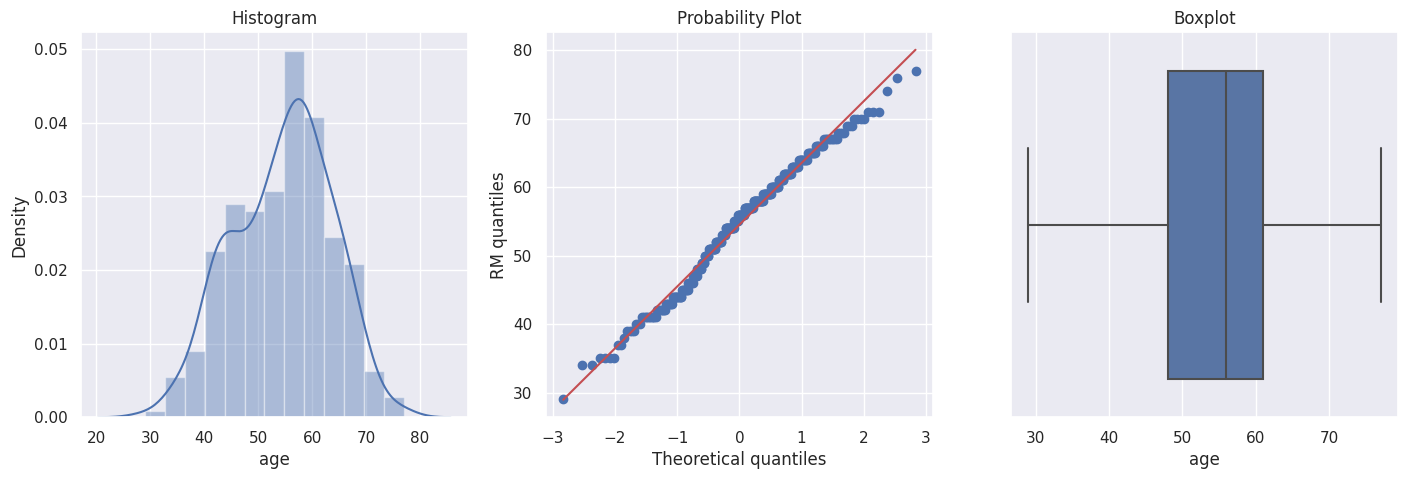

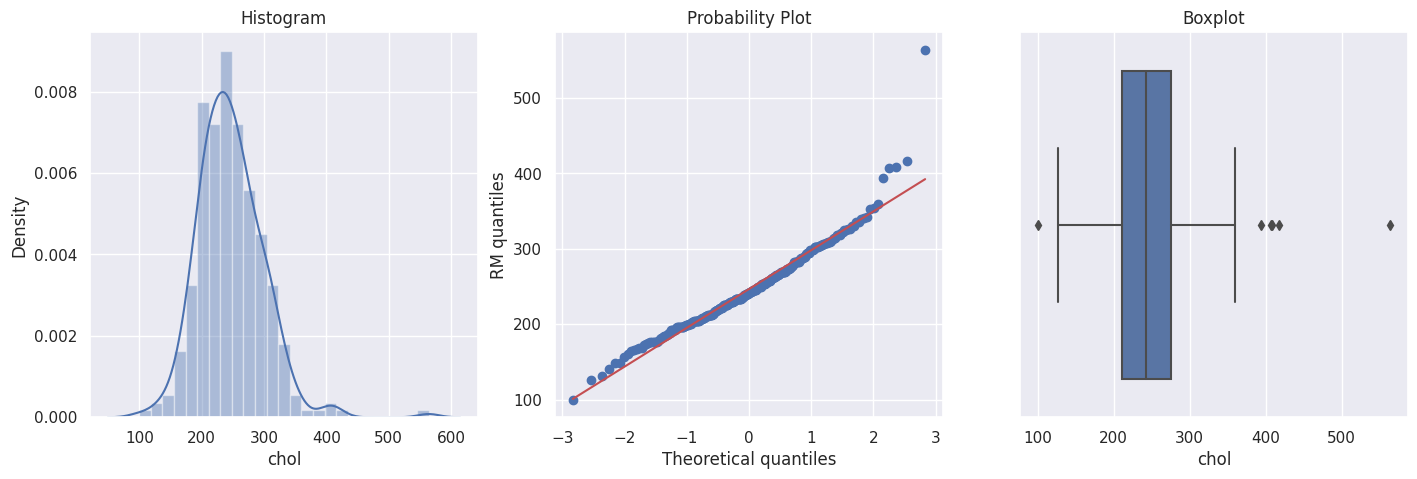

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # Import stats module

def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(17, 5))
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable])
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)  # Use stats.probplot
    plt.ylabel('RM quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[variable])
    plt.title('Boxplot')
    
    plt.show()
   
for col in df[['age','chol']].select_dtypes(exclude="O").columns[:20].to_list():
     diagnostic_plots(df,col)

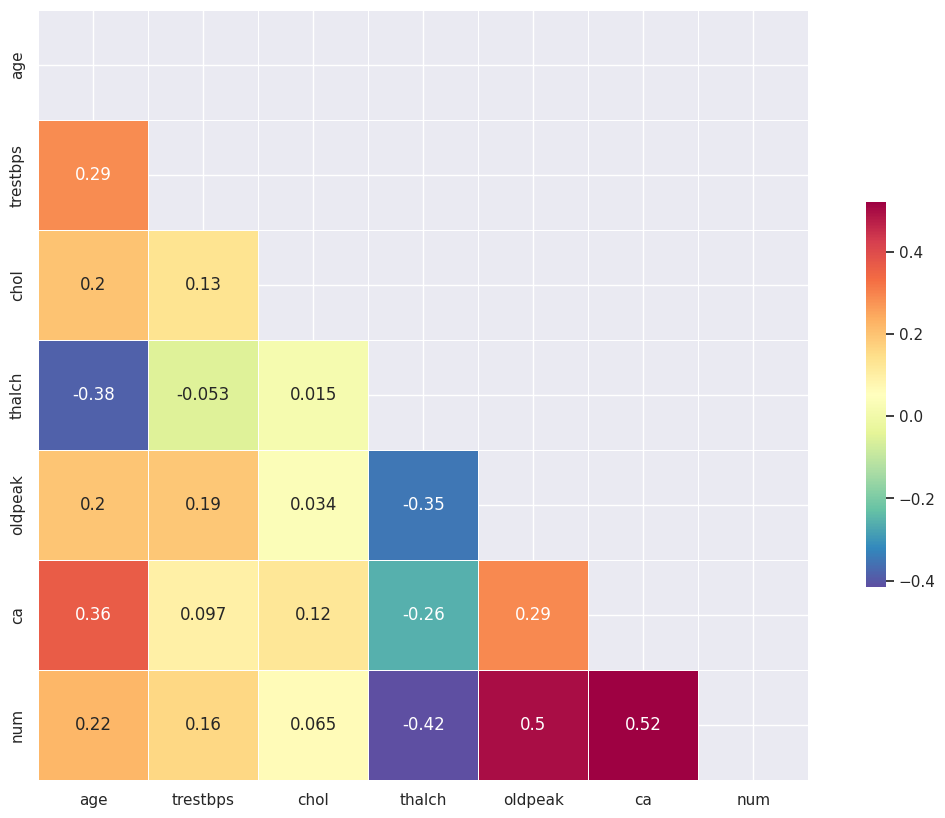

In [17]:
corr = df.select_dtypes('number').drop('id',axis=1).corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, cmap='Spectral_r', mask=mask, square=True, annot=True, linewidth=0.5, cbar_kws={"shrink" : 0.5});

In [18]:
df = df.drop('id',axis=1)
df.head(2)

age   sex    dataset              cp  trestbps   chol    fbs  \
0   63  Male  Cleveland  typical angina     145.0  233.0   True   
1   67  Male  Cleveland    asymptomatic     160.0  286.0  False   

          restecg  thalch  exang  oldpeak        slope   ca          thal  num  
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0  fixed defect    0  
1  lv hypertrophy   108.0   True      1.5         flat  3.0        normal    2

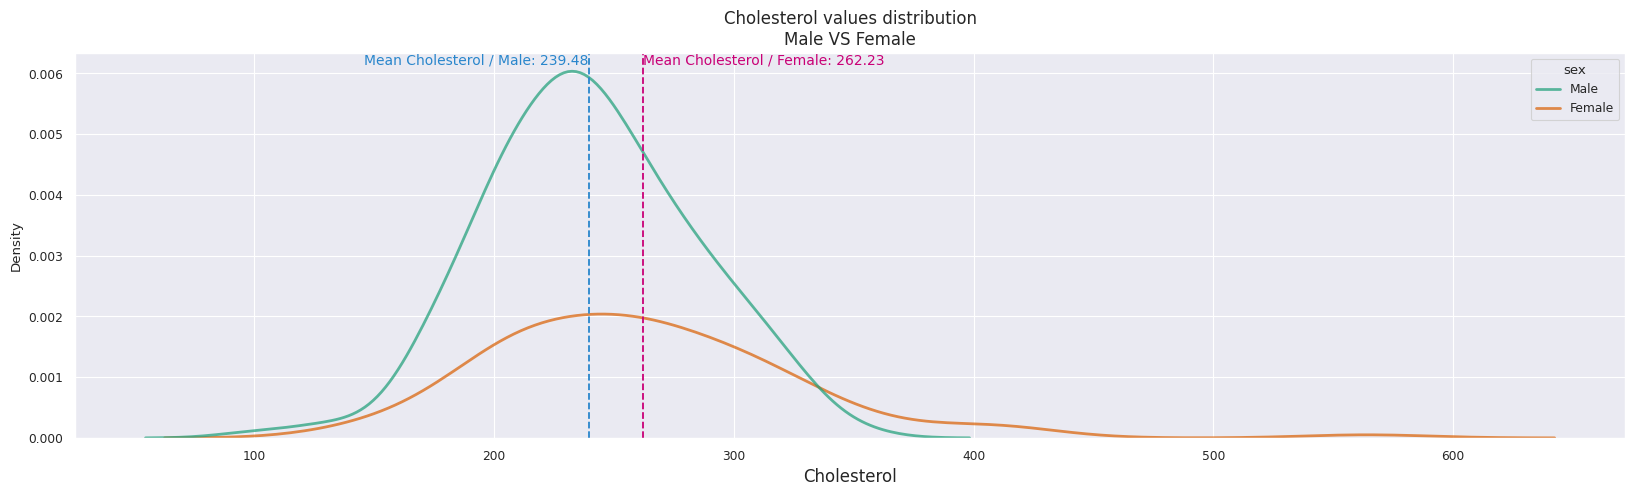

In [19]:
plt.figure(figsize=(20, 5))
sns.set_context("paper")

kdeplt = sns.kdeplot(
    data=df,
    x="chol",
    hue="sex",
    palette='Dark2',
    alpha=0.7,
    lw=2,
)

kdeplt.set_title("Cholesterol values distribution\nMale VS Female", fontsize=12)
kdeplt.set_xlabel("Cholesterol", fontsize=12)

# Calculate mean cholesterol for each sex
mean_male = df[df['sex'] == 'Male']['chol'].mean()
mean_female = df[df['sex'] == 'Female']['chol'].mean()

# Add vertical lines for mean cholesterol
plt.axvline(x=mean_male, color="#2986cc", ls="--", lw=1.3)
plt.axvline(x=mean_female, color="#c90076", ls="--", lw=1.3)

# Add text annotations
plt.text(mean_male, plt.gca().get_ylim()[1], f"Mean Cholesterol / Male: {mean_male:.2f}", 
         fontsize=10, color="#2986cc", ha='right', va='top')
plt.text(mean_female, plt.gca().get_ylim()[1], f"Mean Cholesterol / Female: {mean_female:.2f}", 
         fontsize=10, color="#c90076", ha='left', va='top')

plt.show()

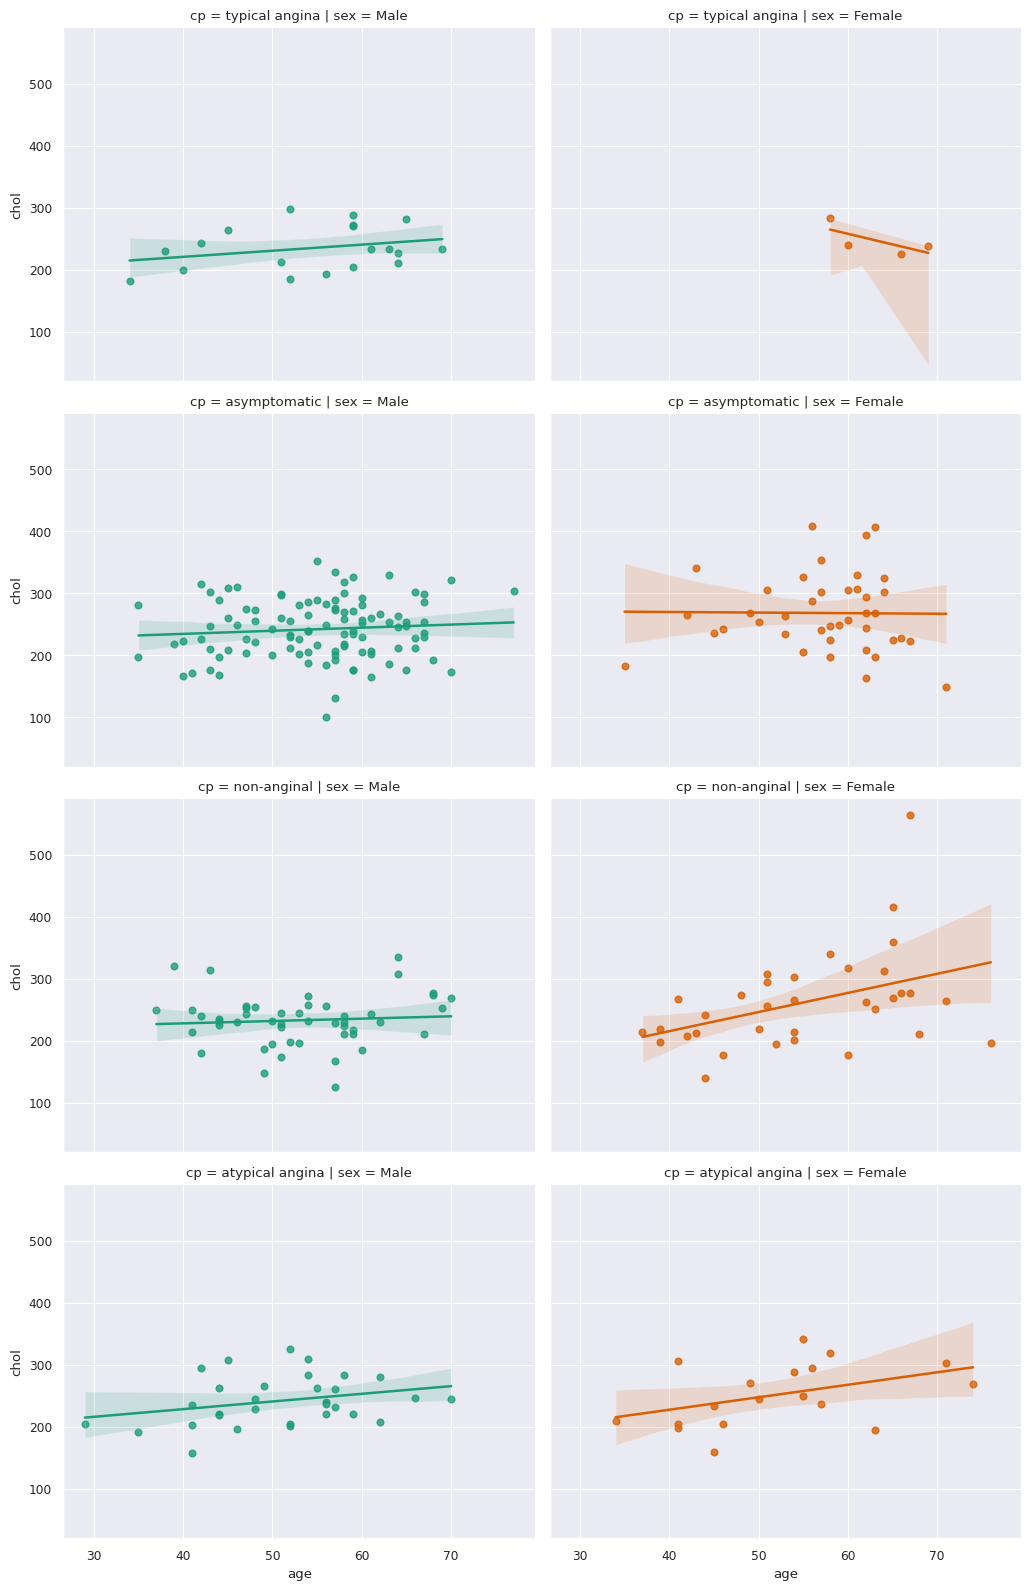

In [20]:
heart_df_fg = sns.FacetGrid(
    data=df,
    col="sex",
    hue="sex",
    row="cp",
    height=4,
    aspect=1.3,
    palette='Dark2',
    col_order=["Male", "Female"],
)
heart_df_fg.map_dataframe(sns.regplot, "age", "chol")
plt.show()


In [21]:
x = df.groupby("cp")["chol"].min().index
y = df.groupby("cp")["chol"].min().values

df = pd.DataFrame({'cp':x,
                  'chol':y })

fig = px.bar(df, 
             x='cp', 
             y='chol',
             color='cp', #color represents brand
             title='Chol Value'
            )
fig.show()

In [22]:
df =  pd.read_csv("/kaggle/input/titanic/heart_disease_uci.csv")
df = df.dropna()
df = df.drop('id',axis =1 )
df.head(2)

age   sex    dataset              cp  trestbps   chol    fbs  \
0   63  Male  Cleveland  typical angina     145.0  233.0   True   
1   67  Male  Cleveland    asymptomatic     160.0  286.0  False   

          restecg  thalch  exang  oldpeak        slope   ca          thal  num  
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0  fixed defect    0  
1  lv hypertrophy   108.0   True      1.5         flat  3.0        normal    2

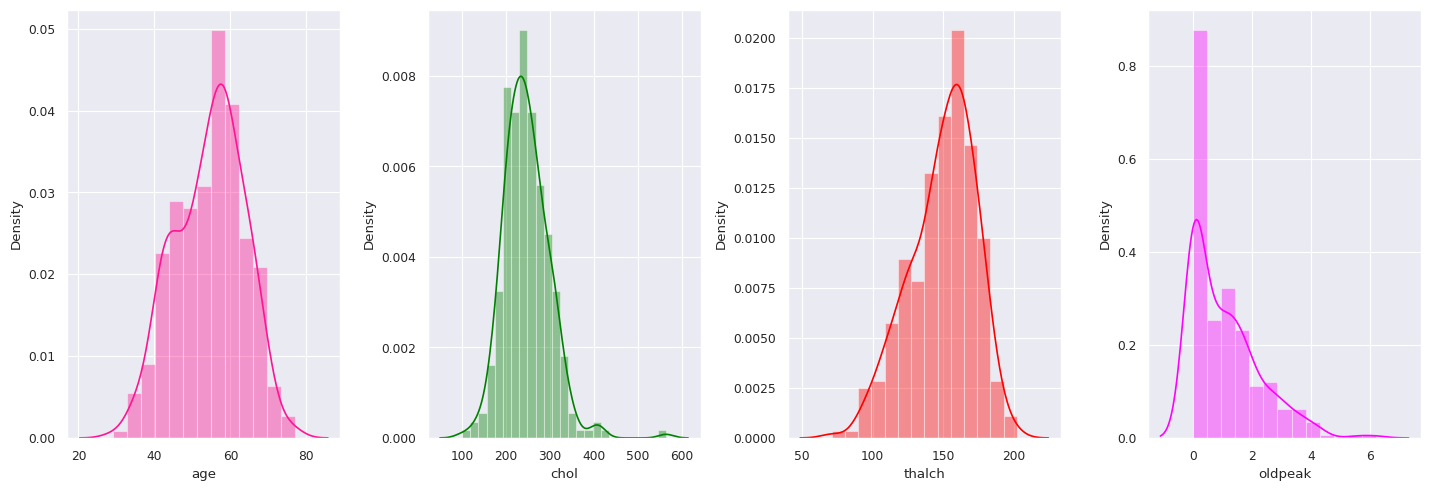

In [23]:
plt.figure(figsize=(18,5))

plt.subplot(1,5,1)
sns.distplot(df['age'],color='DeepPink')
plt.subplot(1,5,2)
sns.distplot(df['chol'],color='Green')
plt.subplot(1,5,3)
sns.distplot(df['thalch'],color='Red')
plt.subplot(1,5,4)
sns.distplot(df['oldpeak'],color='Magenta')

plt.tight_layout()
plt.show()


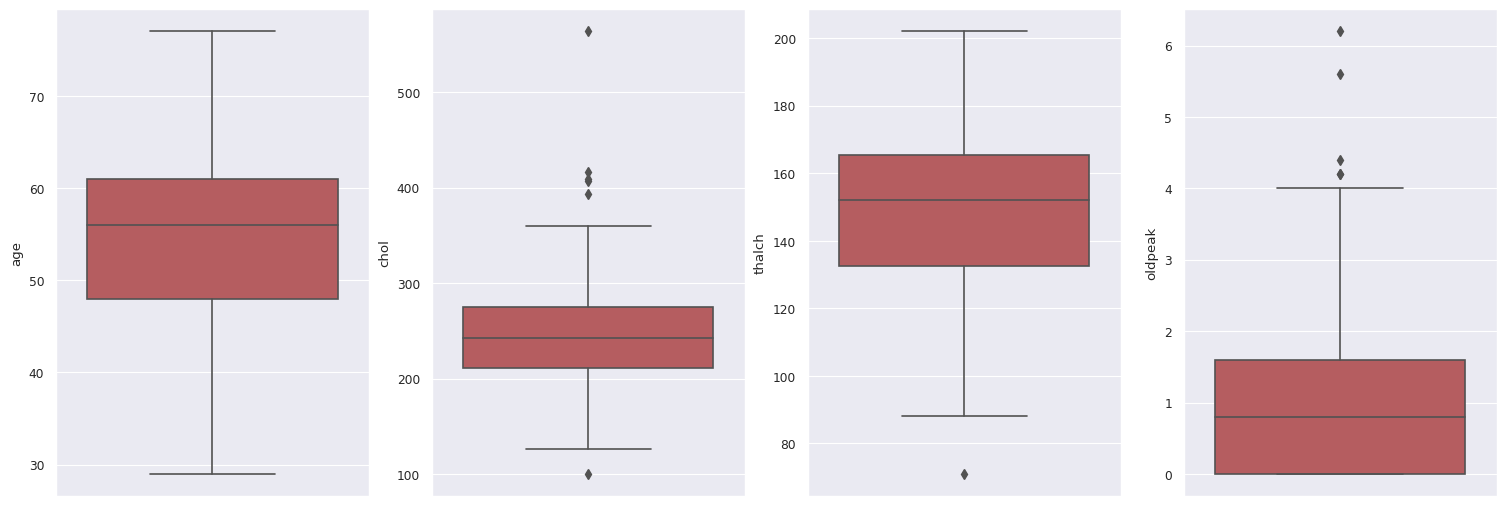

In [24]:
df_cpy = df.copy("Deep")
df_cpy = df_cpy.select_dtypes("number")
df_cpy = df_cpy[['age','chol','thalch','oldpeak']]

fig,axis=plt.subplots(ncols=4,nrows=1,figsize=(15,5))
index=0
axis=axis.flatten()

for col,values in df_cpy.items():
    sns.boxplot(y=col,data=df_cpy,color='r',ax=axis[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

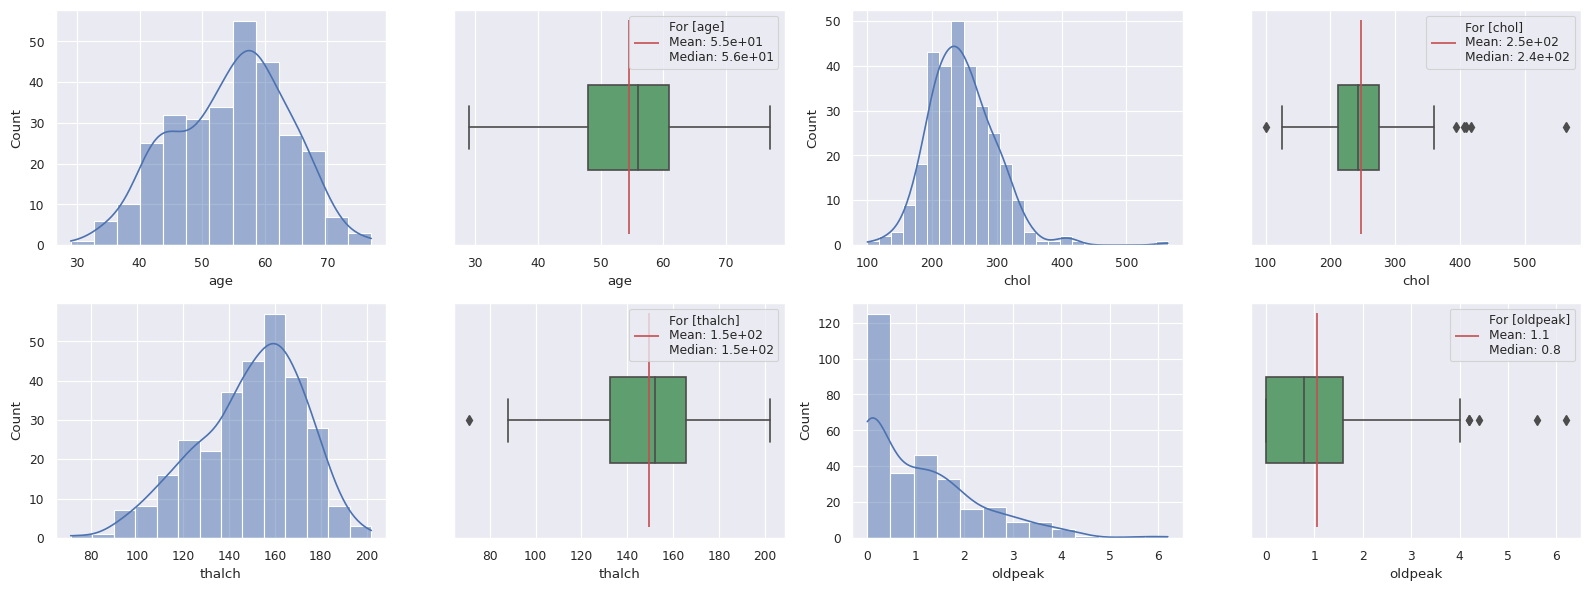

In [25]:
df_cpy = df.copy("Deep")
df_cpy = df_cpy.select_dtypes("number")
df_cpy = df_cpy[['age','chol','thalch','oldpeak']]

flierprops = dict(markerfacecolor='g', color='g', alpha=0.5)

n_cols = 4
n_rows = int(np.ceil(df_cpy.shape[-1]*2 / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
for i, (col) in enumerate(list(df_cpy.columns)):
    mean = df_cpy[col].mean()
    median = df_cpy[col].median()
    sns.histplot(df_cpy[col], ax=axes.flatten()[2*i], kde=True)
    sns.boxplot(x=df_cpy[col], orient='h', ax=axes.flatten()[2*i+1], color='g')
    axes.flatten()[2*i+1].vlines(mean, ymin = -1, ymax = 1, color='r', label=f"For [{col}]\nMean: {mean:.2}\nMedian: {median:.2}")
    axes.flatten()[2*i+1].legend()

    if i % n_cols == 0:
        ax.set_ylabel('Frequency')
    else:
        ax.set_ylabel('')
plt.tight_layout()

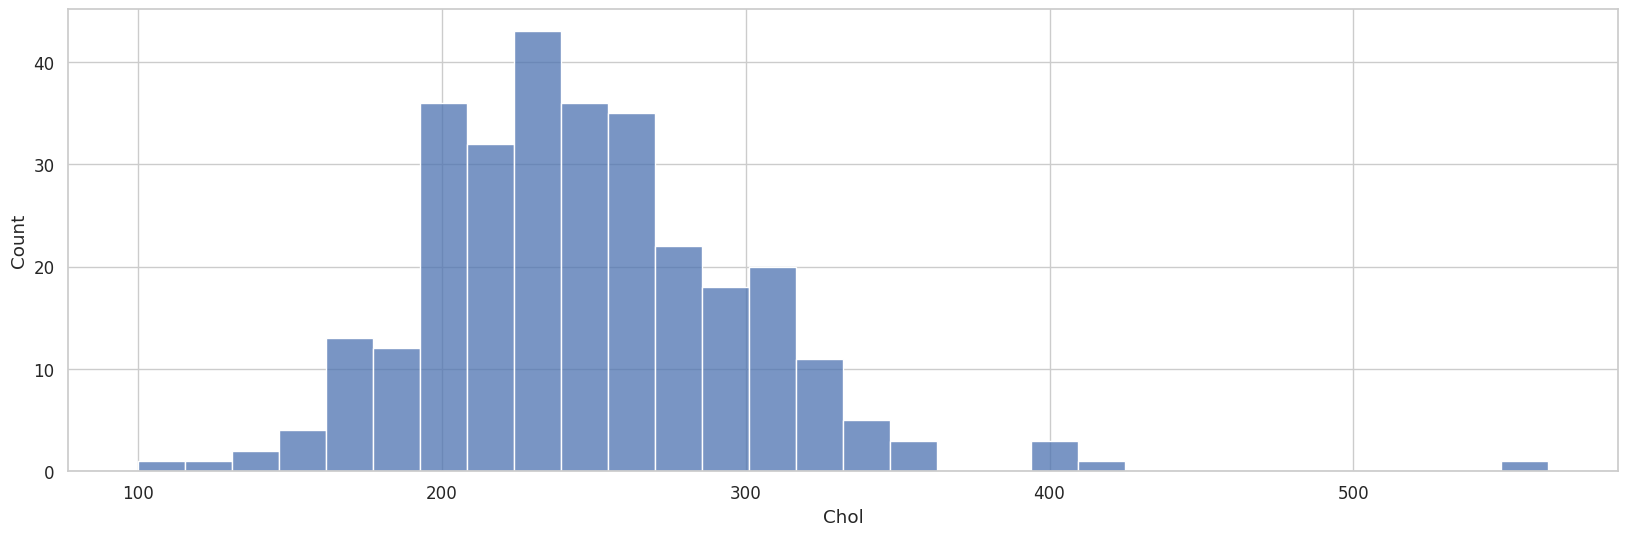

In [26]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 6]})

sns.histplot(df['chol'], bins = 30).set(xlabel = "Chol");

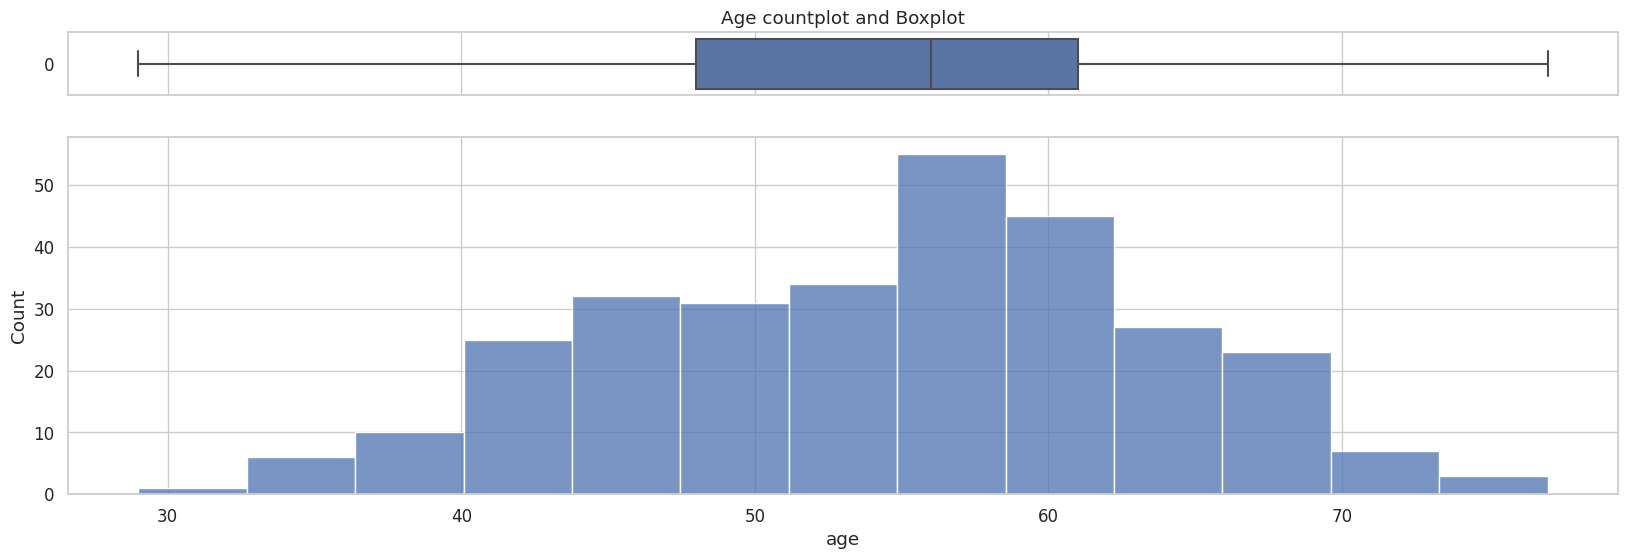

In [27]:
df2 = df[['age','sex','chol']]
 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

ax_box.title.set_text('Age countplot and Boxplot')
sns.boxplot(df2["age"], orient="h" ,ax=ax_box)
sns.histplot(data=df2, x="age", ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

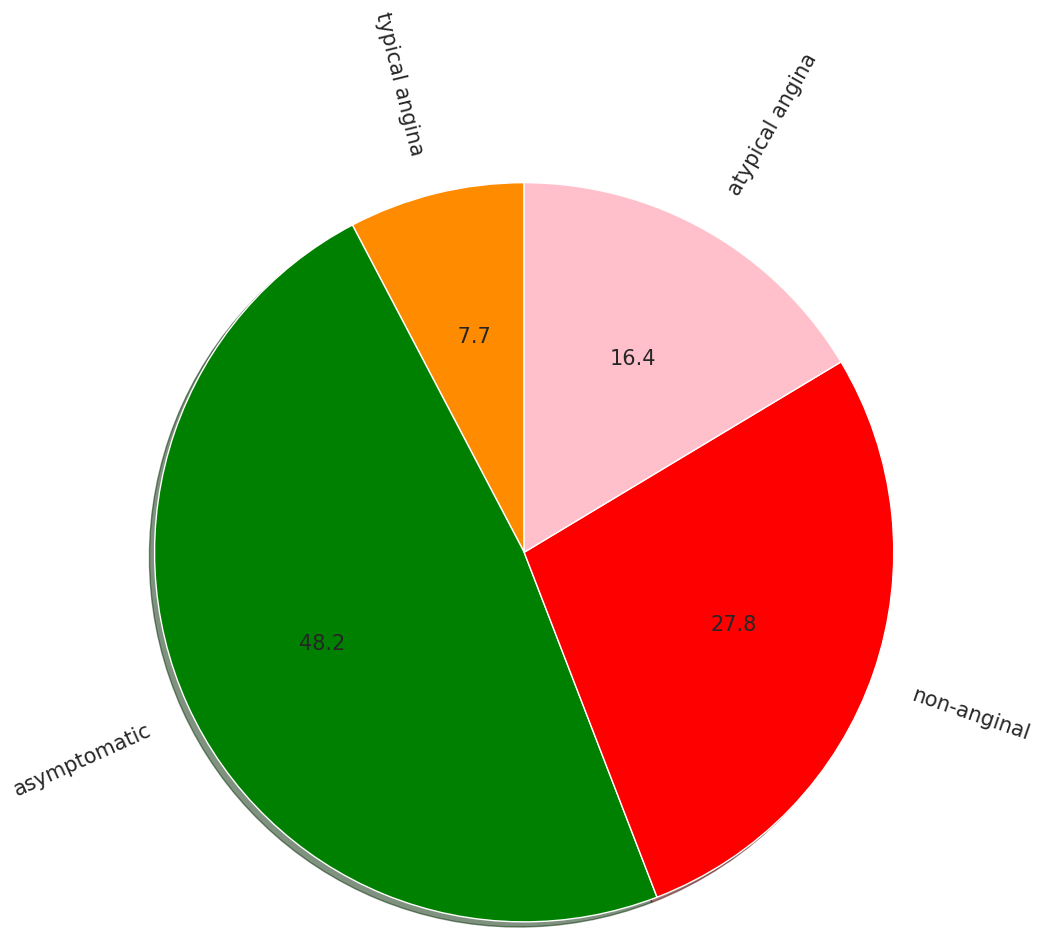

In [28]:
#is online delivery available?
colors  = ("darkorange", "green",'Red','Pink')
explodes = [0.5, 0.5,0.75, .50]
df["cp"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 15}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True) ;


In [29]:
wine = pd.read_csv("/kaggle/input/titanic/WineQT.csv")
wine.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9       0.08   
1            7.8              0.88          0.0             2.6       0.10   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0      1.0  3.51       0.56   
1                 25.0                  67.0      1.0  3.20       0.68   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1

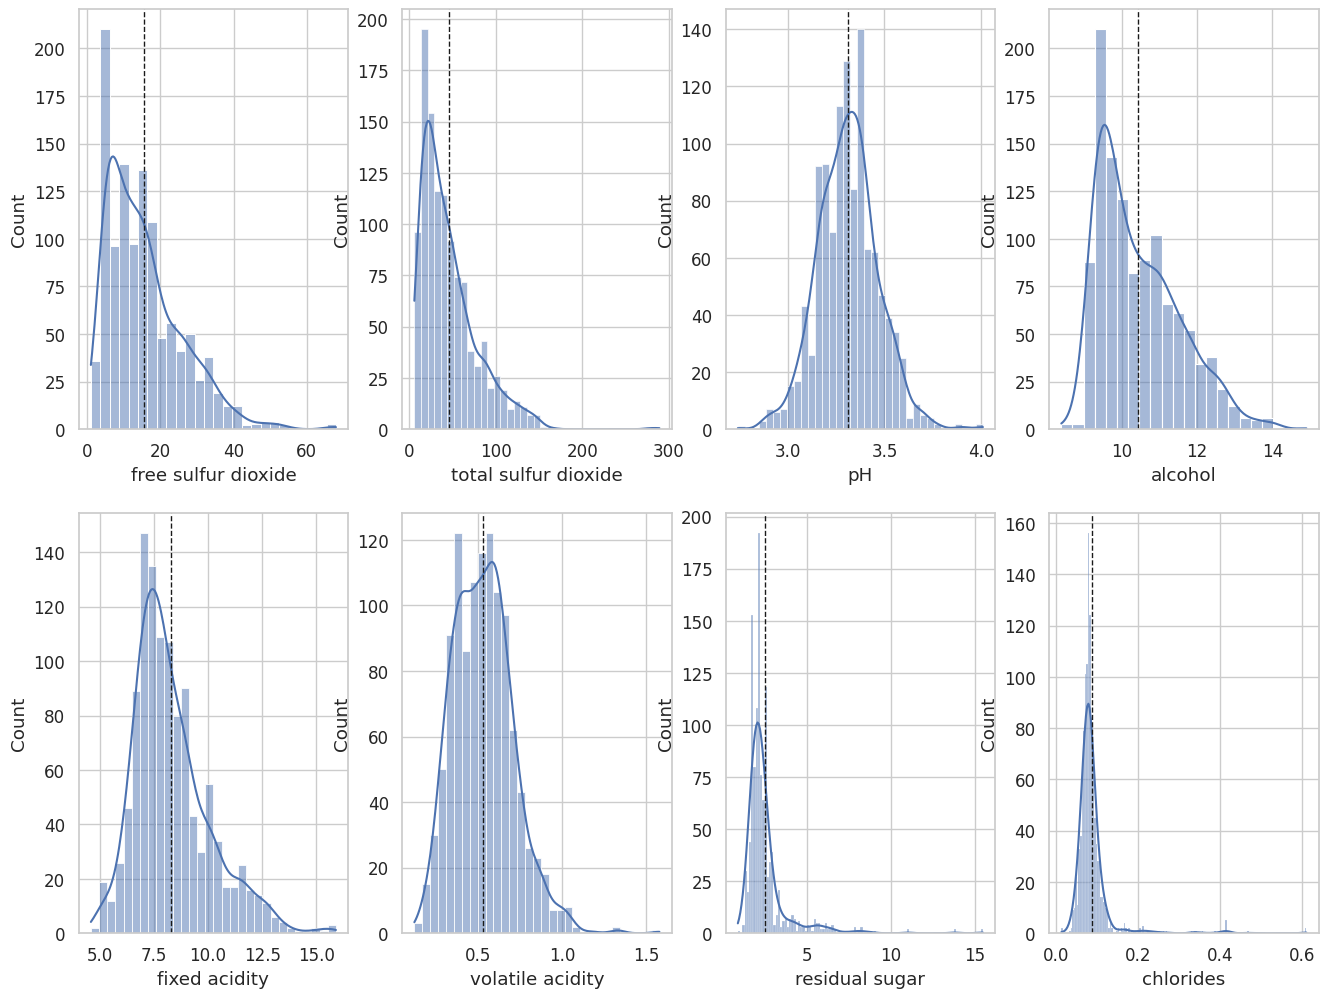

In [30]:
NUMERICAL = wine[['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'pH', 'alcohol']]
fig, axes = plt.subplots(2, 4)
fig.set_figheight(12)
fig.set_figwidth(16)
for i,col in enumerate(NUMERICAL):
    sns.histplot(wine[col],ax=axes[(i // 4) -1 ,(i % 4)], kde = True)
    axes[(i // 4) -1 ,(i % 4)].axvline(wine[col].mean(), color='k', linestyle='dashed', linewidth=1)

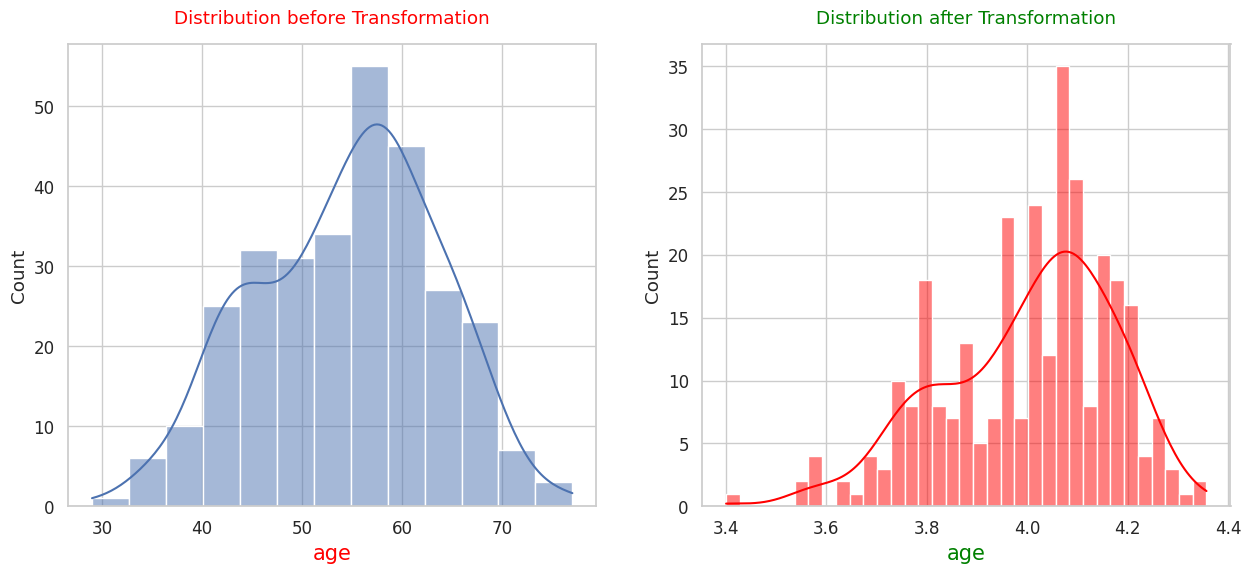

In [31]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

def logTrans(feature):   
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=20,color='red',pad=15,font='Lucida Calligraphy')
    sns.histplot(df[feature], kde=True,palette=['Red','Green','Blue'])
    plt.xlabel(feature,color='Red',fontsize=15)
    
    plt.subplot(1,2,2)
    df_log = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=20,color='Green',pad=15,font='Lucida Calligraphy')
    sns.histplot(df_log,bins=35, kde=True , legend=False,palette=['Red','Green','Blue'])
    plt.xlabel(feature,color='Green',fontsize=15)
    plt.show()
    
logTrans(feature="age")

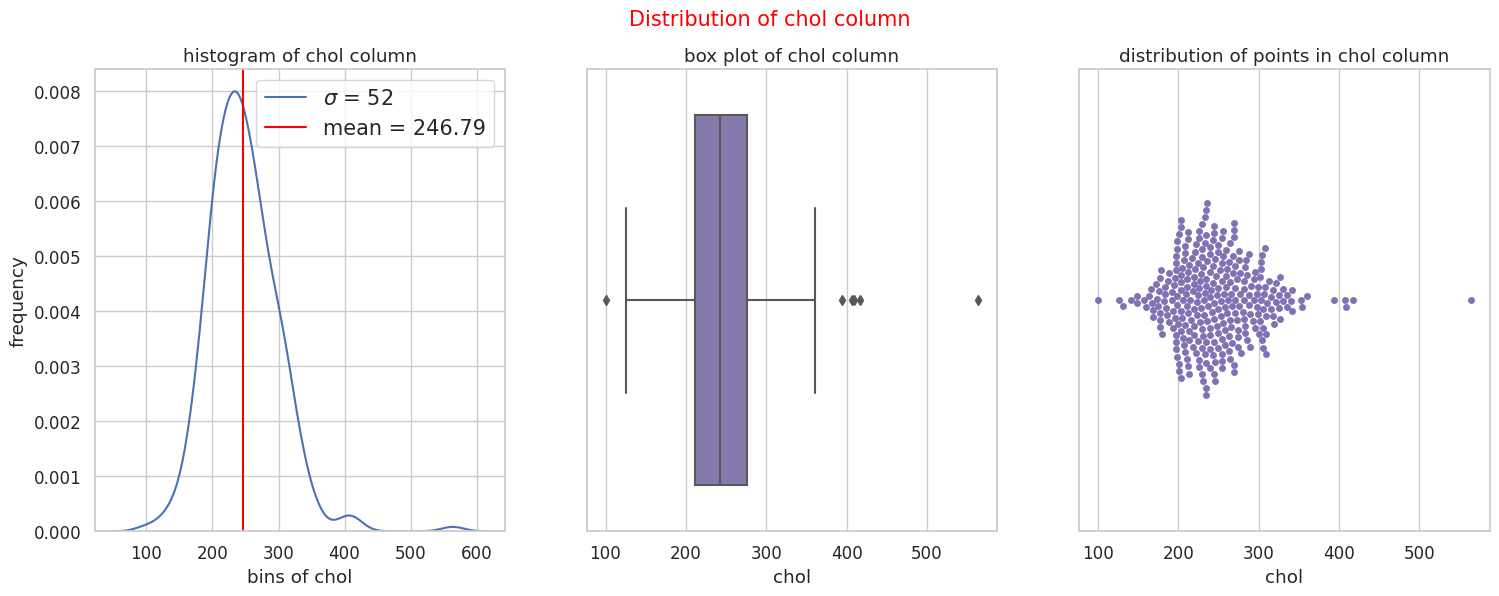

In [32]:
#set configuration for charts 
plt.rcParams["figure.figsize"]=[18 , 6]
plt.rcParams["font.size"]=15
plt.rcParams["legend.fontsize"]="medium"
plt.rcParams["figure.titlesize"]="medium"

def plot_disribution(data , x ,color,bins ):
    mean = data[x].mean()
    std = data[x].std()
    info=dict(data = data , x = x , color = color)
    plt.subplot(1 , 3 , 1 , title =f"Ditstribution of {x} column")
    sns.distplot(a=data[x] , bins = bins)
    plt.xlabel(f"bins of {x}")
    plt.axvline(mean , label ="mean" , color ="red")
    plt.ylabel("frequency")
    plt.legend(["${\sigma}$ = %d"%std , f"mean = {mean:.2f}"])
    plt.title(f"histogram of {x} column")
    plt.subplot(1 , 3 , 2)
    sns.boxplot(**info)
    plt.xlabel(f"{x}")
    plt.title(f"box plot of {x} column")
    plt.subplot(1 , 3 , 3)
    sns.swarmplot(**info)
    plt.xlabel(f"{x}")
    plt.title(f"distribution of points in {x} column")
    plt.suptitle(f"Distribution of {x} column" , fontsize =15 , color="red")
plt.show()

age_bins = np.arange(29 , 77+5 , 5)
base_color = sns.color_palette()[4]
plot_disribution(data = df , x ="chol" , color = base_color , bins=age_bins)

In [33]:
df.head(2)

age   sex    dataset              cp  trestbps   chol    fbs  \
0   63  Male  Cleveland  typical angina     145.0  233.0   True   
1   67  Male  Cleveland    asymptomatic     160.0  286.0  False   

          restecg  thalch  exang  oldpeak        slope   ca          thal  num  
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0  fixed defect    0  
1  lv hypertrophy   108.0   True      1.5         flat  3.0        normal    2

In [34]:
df['thal'].value_counts()

thal
normal               164
reversable defect    117
fixed defect          18
Name: count, dtype: int64

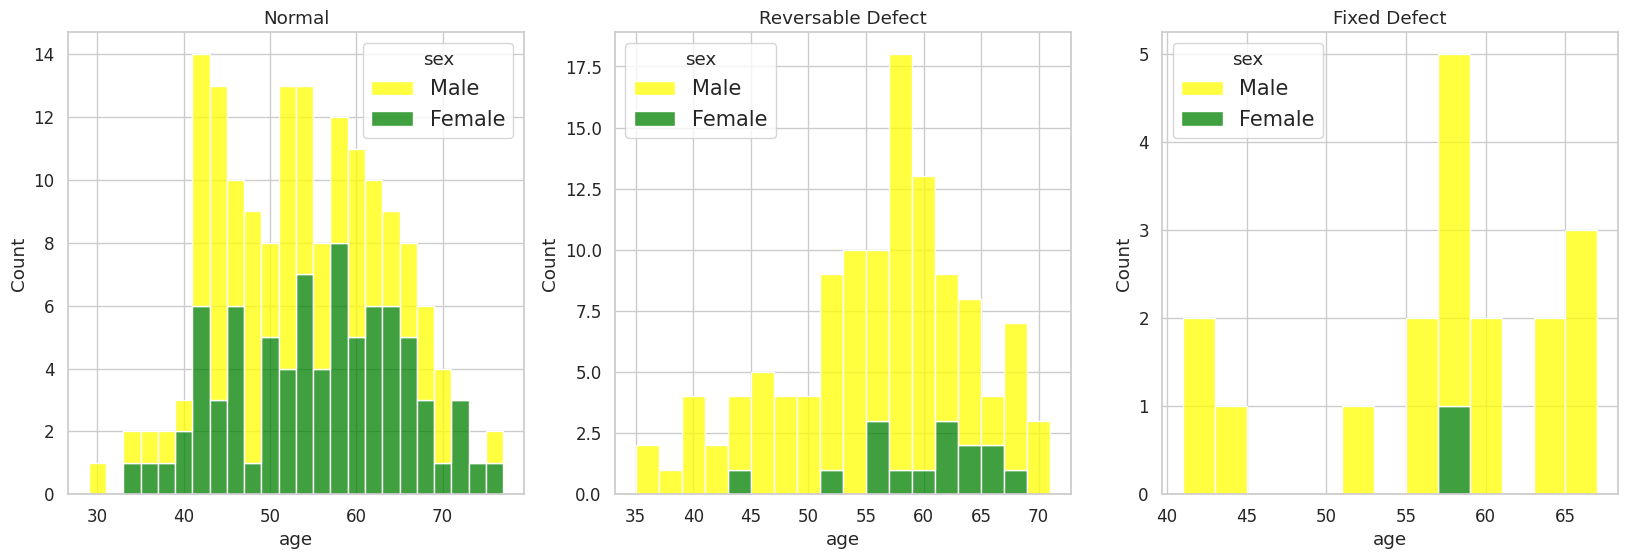

In [35]:
plot , ax = plt.subplots(1 , 3 , figsize=(20,6))
sns.histplot(data = df.loc[df["thal"]== 'normal'] , x = "age" , hue = "sex",binwidth=2,ax = ax[0],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("Normal")
sns.histplot(data = df.loc[df["thal"]== 'reversable defect'] , x = "age" , hue = "sex",binwidth=2,ax = ax[1],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("Reversable Defect")
sns.histplot(data = df.loc[df["thal"]== 'fixed defect'] , x = "age" , hue = "sex",binwidth=2,ax = ax[2],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("Fixed Defect")
plt.show()

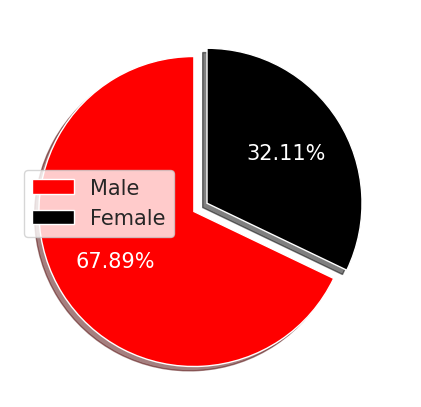

In [36]:
sex = ["Male", "Female"]
values = df["sex"].value_counts()
color = ["#FF0000", "#000000"]

plt.figure(figsize = (5, 7))
plt.pie(values, labels = sex, colors = color, explode = (0.1, 0), textprops = {"color":"w"}, autopct = "%.2f%%", shadow = True, startangle = 90)

plt.legend();


In [37]:
df.head(2)

age   sex    dataset              cp  trestbps   chol    fbs  \
0   63  Male  Cleveland  typical angina     145.0  233.0   True   
1   67  Male  Cleveland    asymptomatic     160.0  286.0  False   

          restecg  thalch  exang  oldpeak        slope   ca          thal  num  
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0  fixed defect    0  
1  lv hypertrophy   108.0   True      1.5         flat  3.0        normal    2

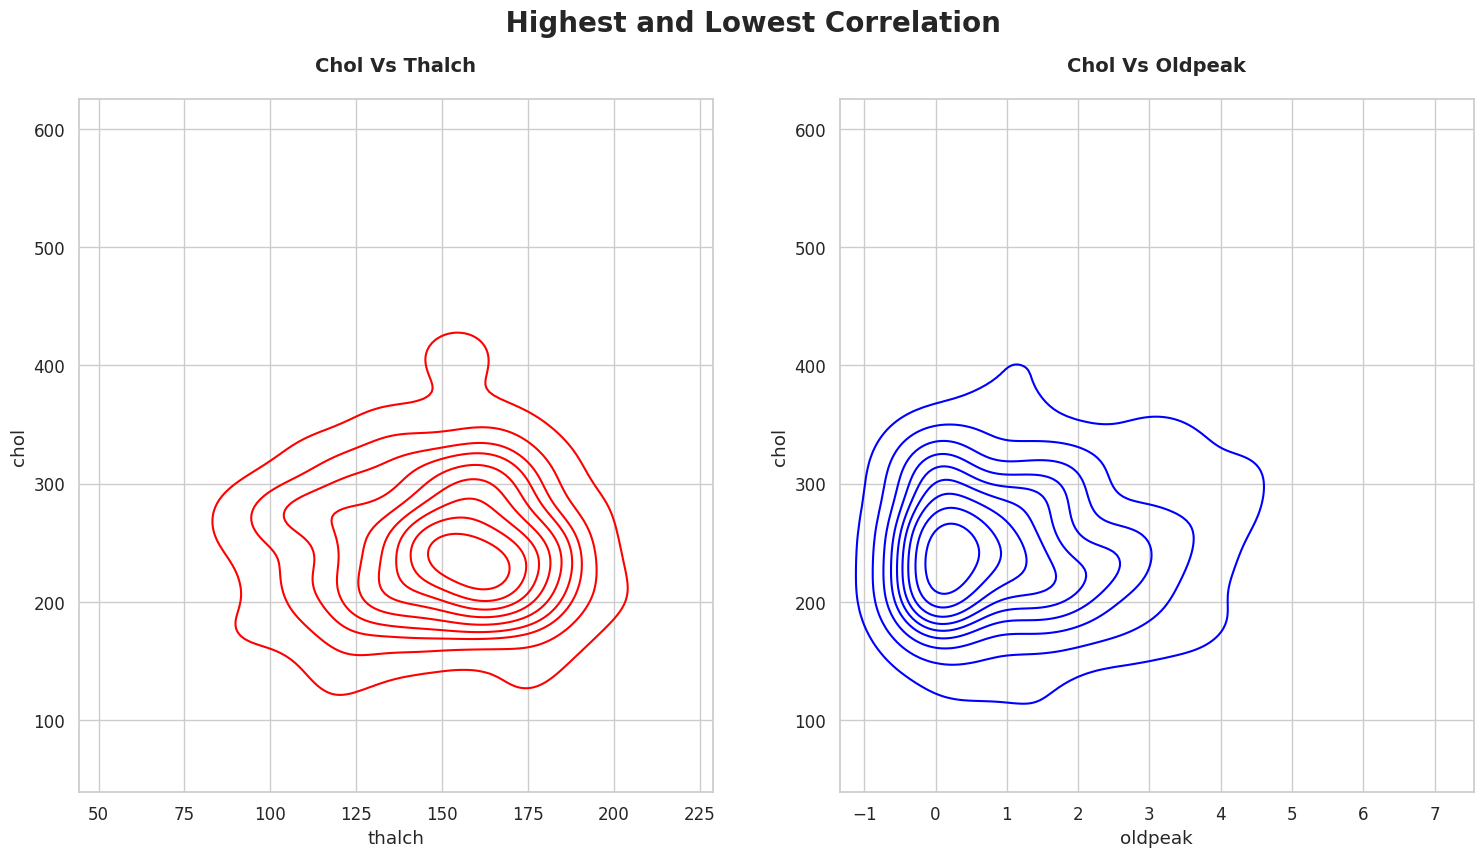

In [38]:
#plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
fig.suptitle(' Highest and Lowest Correlation ', size = 20, weight='bold')
axs = [ax1, ax2]

#kdeplot
sns.kdeplot(data=df, y='chol', x='thalch', ax=ax1, color="red")
ax1.set_title('Chol Vs Thalch', size = 14, weight='bold', pad=20)

#kdeplot
sns.kdeplot(data=df, y='chol', x='oldpeak', ax=ax2, color='Blue')
ax2.set_title('Chol Vs Oldpeak', size = 14, weight='bold', pad=20);

In [39]:
df1 = pd.read_csv('/kaggle/input/titanic/US_Job_Market.csv')
df1 = df1.dropna().reset_index()
df1 = df1.drop('index',axis=1)
df1.head(2)

position           company  \
0                                       Data Analyst    Operation HOPE   
1  Assistant Professor -TT - Signal Processing & ...  Emory University   

                                         description  reviews  \
0  DEPARTMENT: Program OperationsPOSITION LOCATIO...     44.0   
1  DESCRIPTION\nThe Emory University Department o...    550.0   

             location  
0  Atlanta, GA 30303   
1         Atlanta, GA

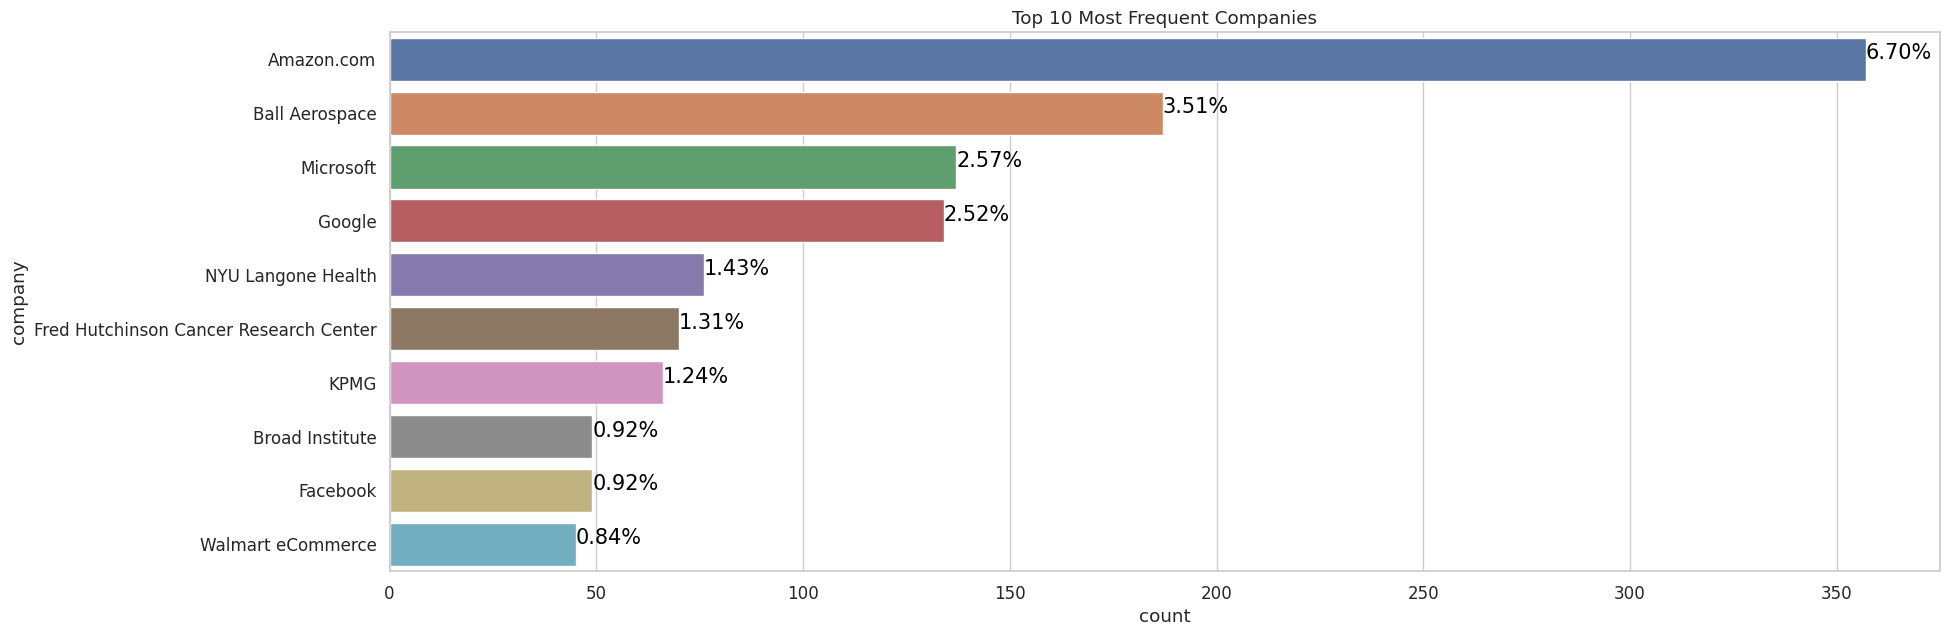

In [40]:
plt.figure(figsize=(20, 7))

# Filter for the top 10 most frequent companies
df_v = df1['company'].value_counts().head(10).reset_index()
df_v.columns = ['company', 'count']

# Calculate the percentage
total = df1['company'].value_counts().sum()
df_v['percentage'] = (df_v['count'] / total) * 100

# Create the bar plot
plot = sns.barplot(y='company', x='count', data=df_v)

# Annotate the bars with the percentage
for index, row in df_v.iterrows():
    plot.text(row['count'], index, f"{row['percentage']:.2f}%", color='black', ha="left")

plt.xticks(rotation=0)
plt.title('Top 10 Most Frequent Companies')
plt.show()


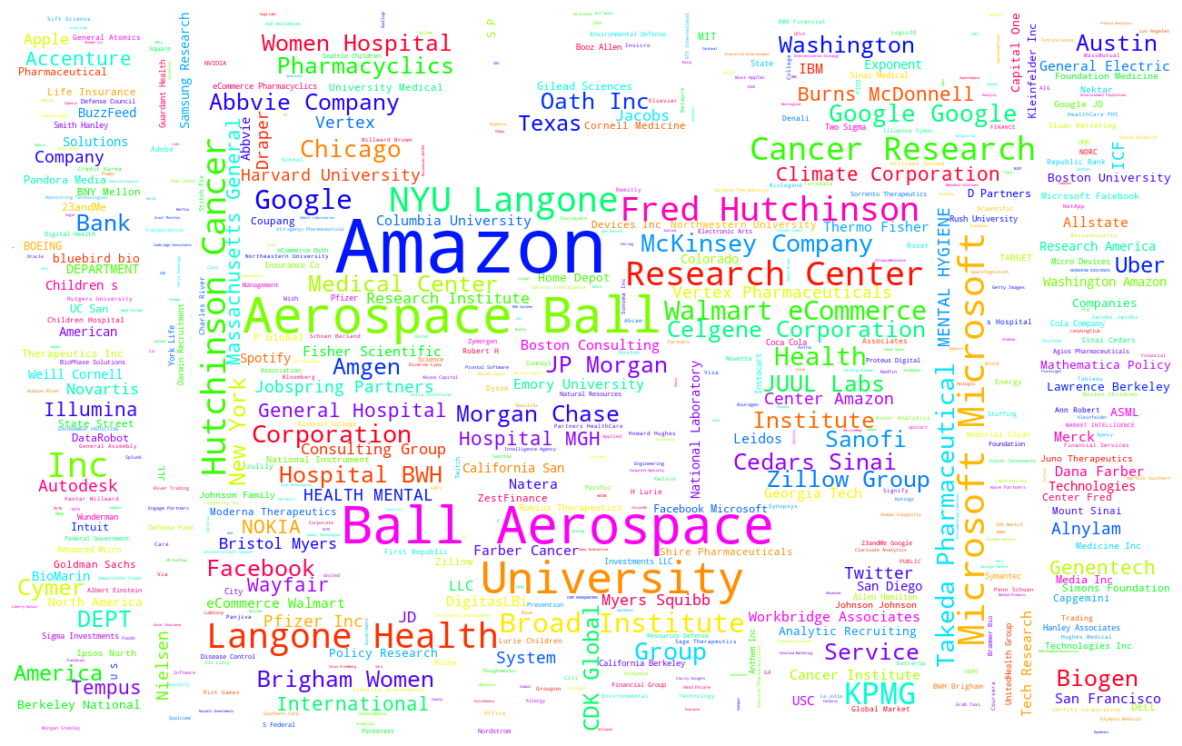

In [41]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import requests
from io import BytesIO

# Download mask image
mask_url = "https://cdn.pixabay.com/photo/2013/07/12/17/47/test-pattern-152459_1280.png"
response = requests.get(mask_url)
mask_image = Image.open(BytesIO(response.content))
wordcloud_mask = np.array(mask_image)

# Generate word cloud
plt.figure(figsize=(15,15))
all_text = " ".join(df1['company'].values.tolist())
wordcloud = WordCloud(width=800, 
                      height=800,
                      stopwords=STOPWORDS, 
                      background_color='white', 
                      max_words=800,
                      colormap="hsv",
                      mask=wordcloud_mask).generate(all_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

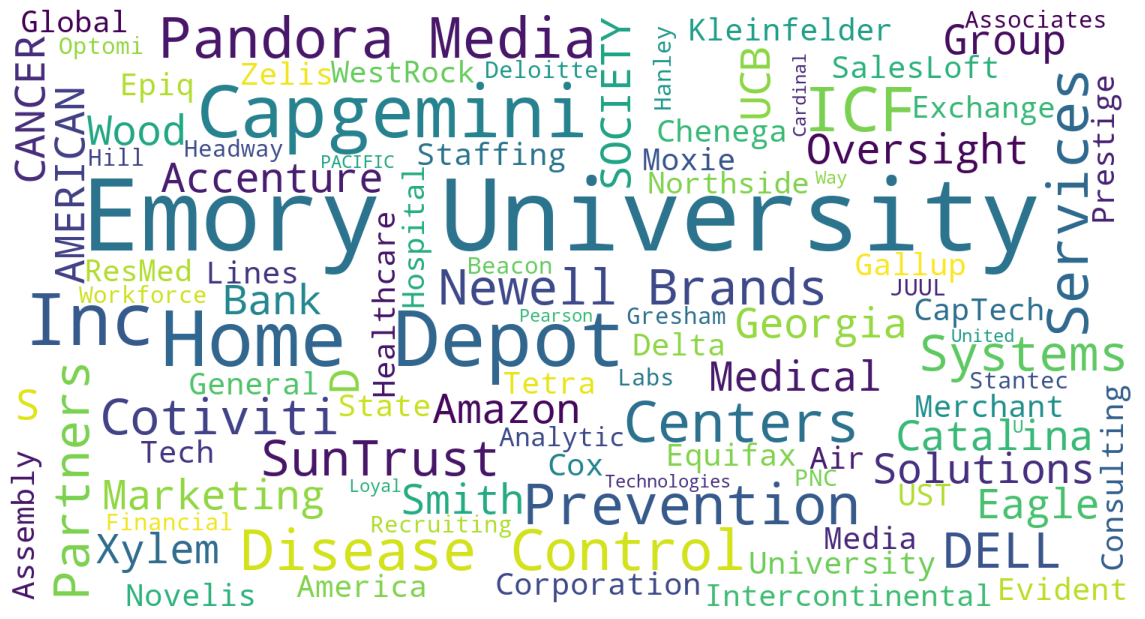

In [42]:
from wordcloud import WordCloud

# create a word cloud for positive reviews
positive_reviews = df1[df1['location'] == 'Atlanta, GA']['company'].str.cat(sep=' ')
positive_cloud = WordCloud(width=1500, height=800, max_words=100, background_color='white').generate(positive_reviews)

plt.figure(figsize=(20, 6), facecolor=None)
plt.imshow(positive_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [43]:
import plotly.graph_objs as go
values = df1['company'].value_counts()[:10]
labels=values.index
text=values.index
fig = go.Figure(data=[go.Pie(values=values,labels=labels,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=3)))
fig.update_layout(title="Most popular Jobs in USA",
                  titlefont={'size': 30},
                  )
fig.show()


Count of unique Jobs in USA


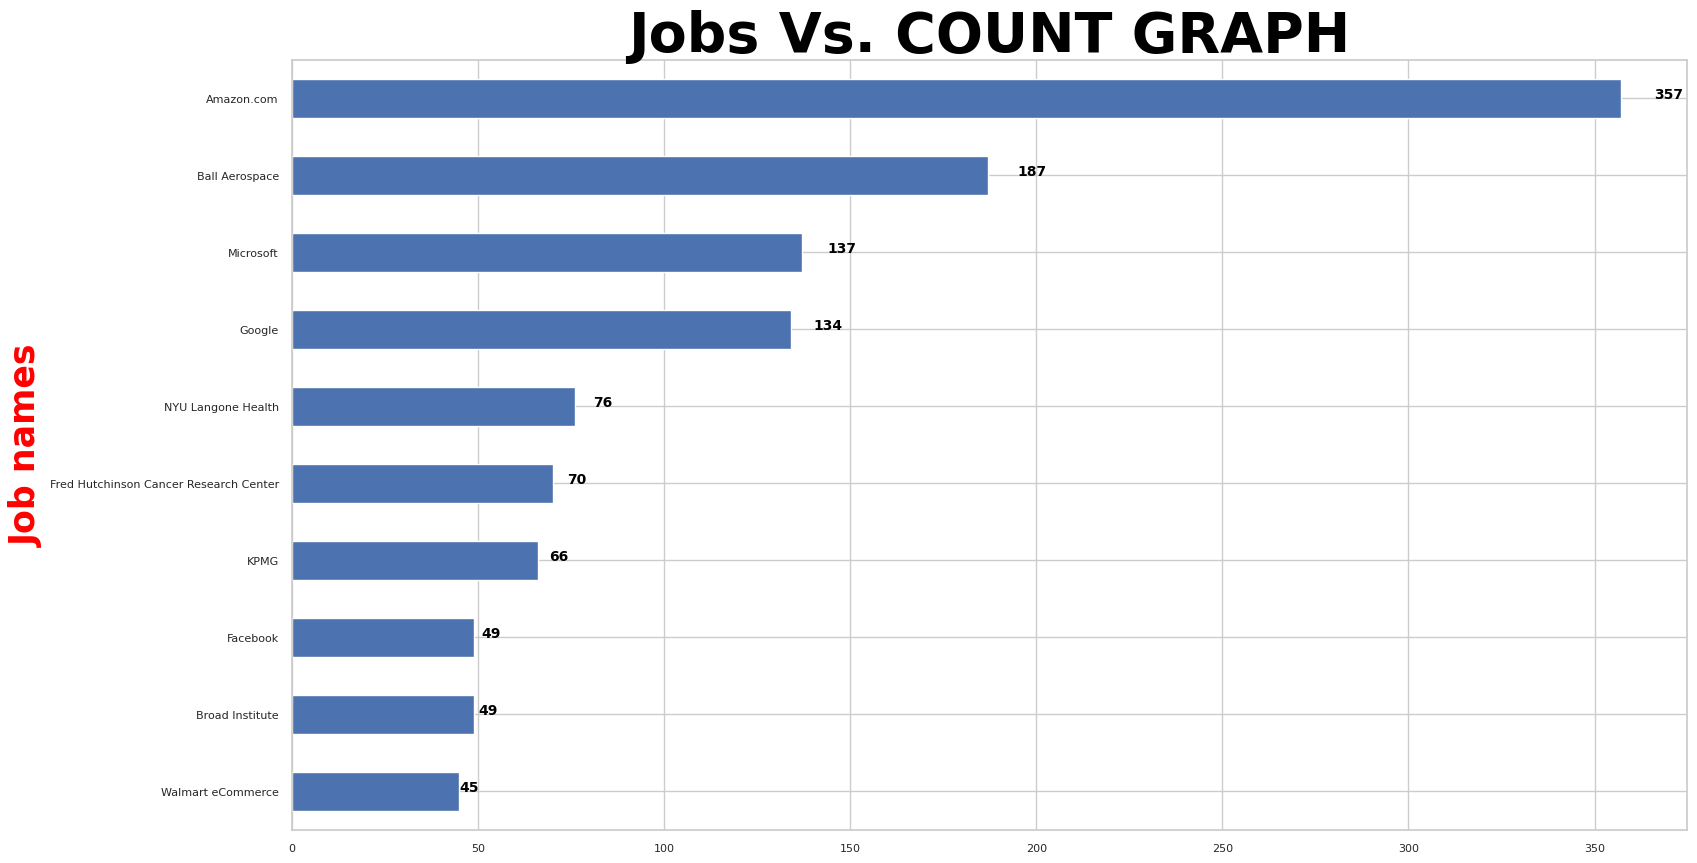

In [44]:
print("Count of unique Jobs in USA")
locationCount=df1['company'].value_counts().head(10).sort_values(ascending=True)
locationCount

fig=plt.figure(figsize=(18,10))
locationCount.plot(kind="barh",fontsize=8)
plt.ylabel("Job names",fontsize=25,color="red",fontweight='bold')
plt.title("Jobs Vs. COUNT GRAPH",fontsize=40,color="BLACK",fontweight='bold')
for v in range(len(locationCount)):
    plt.text(v+locationCount[v],v,locationCount[v],fontsize=10,color="BLACK",fontweight='bold')

In [45]:
z=df1['position'].value_counts().head(10)
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'job title','y':'count','text':'count'},template='seaborn',title='<b> Top 10 Popular Roles in Data Sceince')
fig.show()


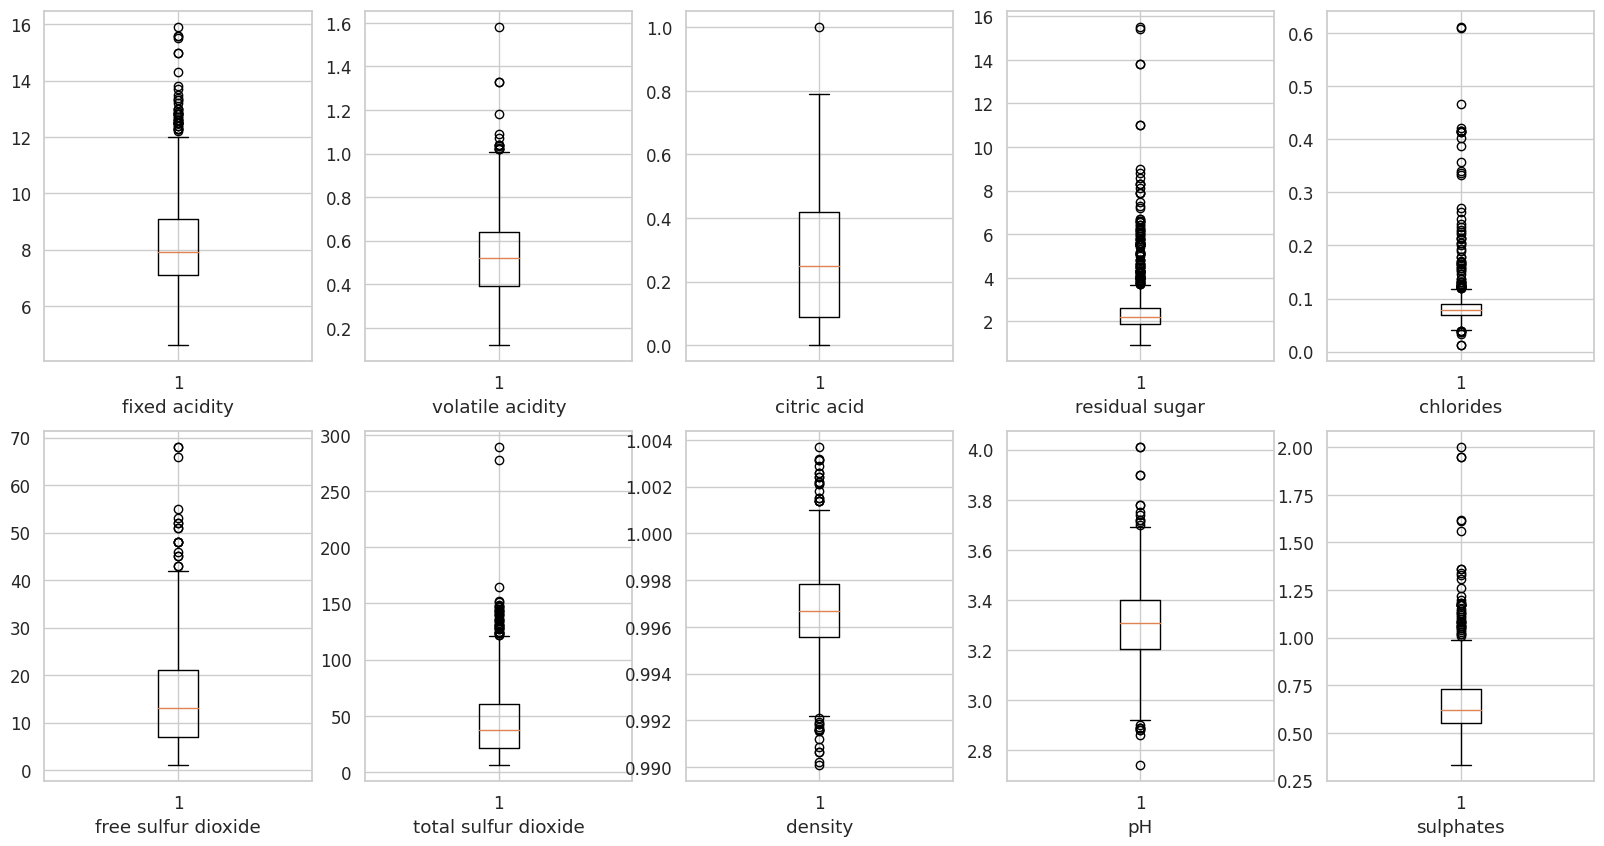

In [46]:
# Plotting Outliers
col = 1
plt.figure(figsize = (20, 10))
for i in wine.columns:
    if col < 11:
        plt.subplot(2, 5, col)
        plt.boxplot(wine[i])
        plt.xlabel(i)
    col = col + 1

In [47]:
wine.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')


In [48]:
df[df["age"] >= 50].describe().style.background_gradient(cmap='RdPu')

In [49]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')
df.describe().style.apply(highlight_min, props='color:yellow;background-color:Grey', axis=0)

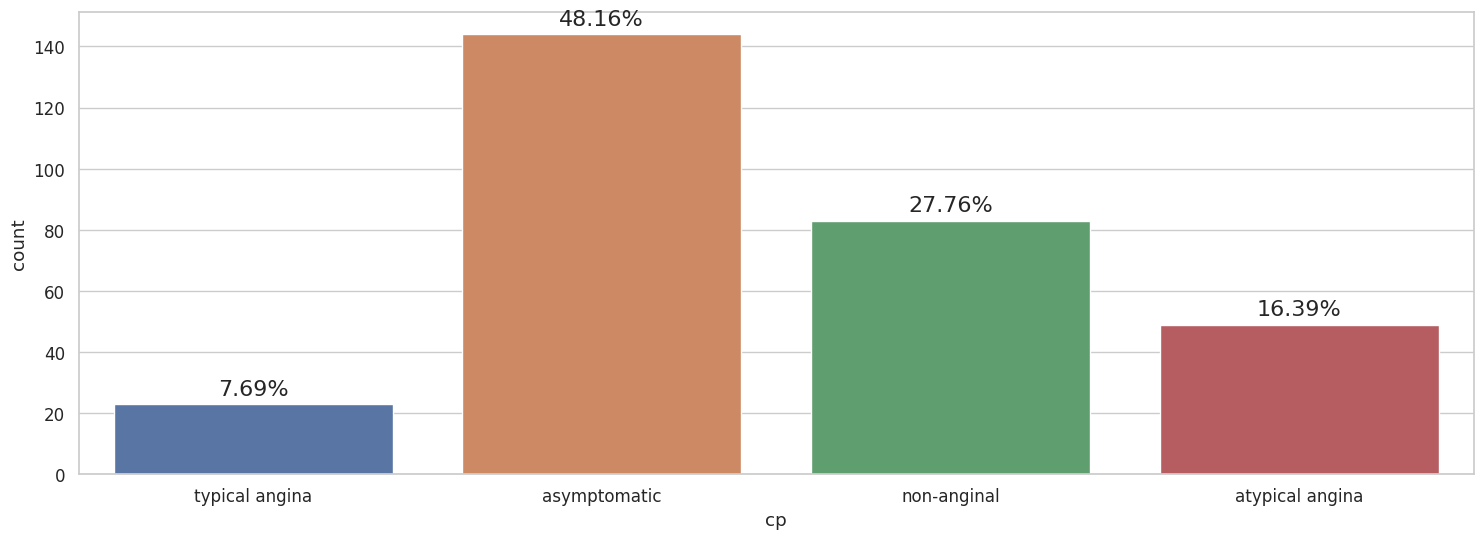

In [50]:
s = sns.countplot(x = 'cp',data = df)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df)*100),
            ha="center", fontsize=16) 

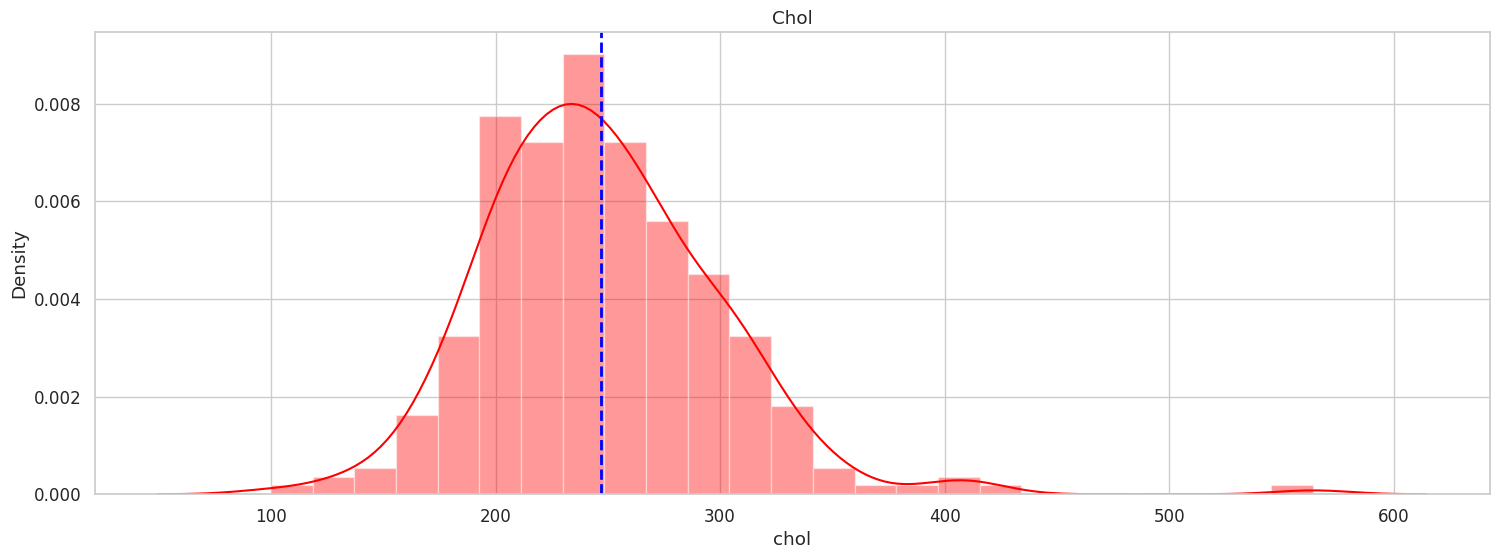

In [51]:
#checking the target variables for distribution
sns.distplot(df['chol'],color='Red')
plt.axvline(x=df['chol'].mean(), color='Blue', linestyle='--', linewidth=2)
plt.title('Chol');

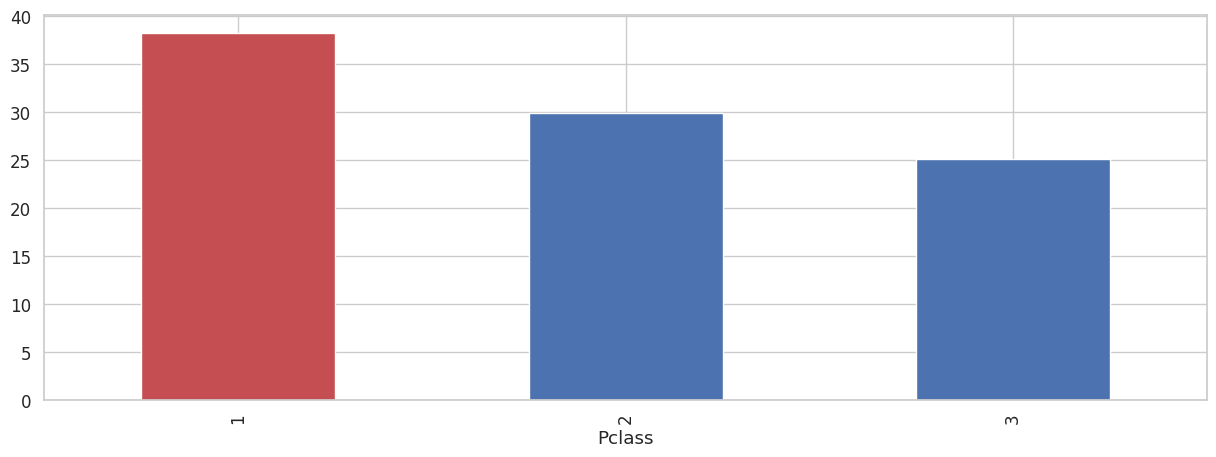

In [52]:
titanic = pd.read_csv("/kaggle/input/titanic/titanic.csv")

df2=titanic.groupby('Pclass')['Age'].mean().sort_values(ascending=False)
plt.figure(figsize = (15,5))
color = [('b' if i < 30 else 'r') for i in df2]
df2.plot.bar(color=color);

In [53]:
df.head(2)

age   sex    dataset              cp  trestbps   chol    fbs  \
0   63  Male  Cleveland  typical angina     145.0  233.0   True   
1   67  Male  Cleveland    asymptomatic     160.0  286.0  False   

          restecg  thalch  exang  oldpeak        slope   ca          thal  num  
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0  fixed defect    0  
1  lv hypertrophy   108.0   True      1.5         flat  3.0        normal    2

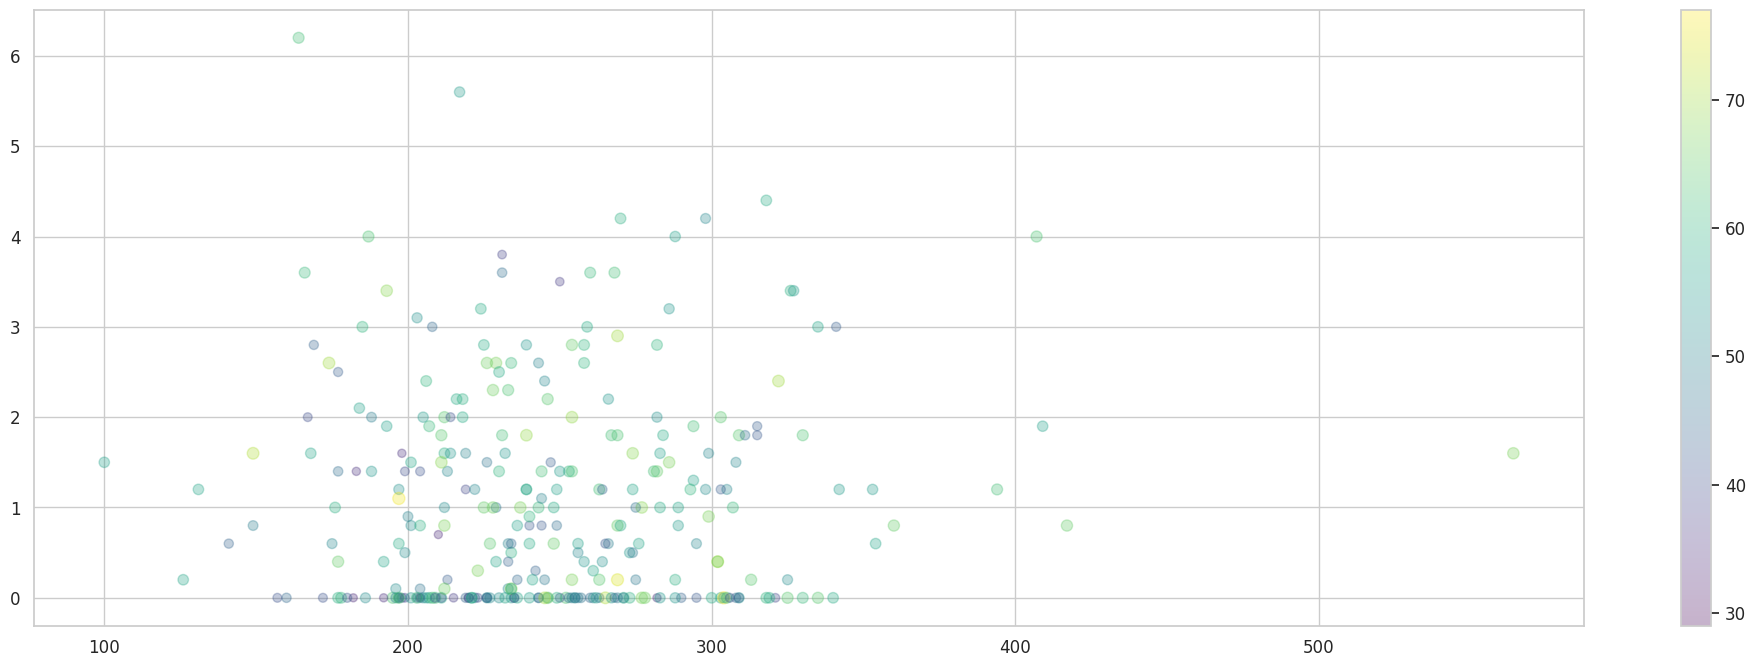

In [54]:
x = df["chol"]
y = df["oldpeak"]
colors = df["age"]
sizes = df["age"]

plt.figure(figsize = (25, 8))
plt.ticklabel_format(style = 'plain')
plt.scatter(x, y, c = colors, s = sizes, alpha = 0.3, cmap = 'viridis')
plt.colorbar();